___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://d33wubrfki0l68.cloudfront.net/4ec62c1c925a380c912ddad740d18554c6822a11/fabe4/img/sponsors/iteso-university.png" width="300" height="500" />
    
    
### <font color='navy'> Modelado de pronóstico de series de tiempo.

**Nombres:** Melanie Michel, Santiago Aguirre y Regina Flores

**Fecha:** 15 de mayo del 2025.

**Expediente** : 735572, 742976 7 742641.

**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/melanie257michel/Proyecto-final-modelos

# Proyecto Final

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Proyecto_en_construccion.jpg" width="300px" height="100px" />


# 📘 Proyecto Final — Modelado No Lineal de Series de Tiempo

## 🎯 Objetivo general

Desarrollar un proyecto aplicado de modelado de series de tiempo que integre los tres temas principales del curso: construcción de modelos de pronóstico, aplicación de modelos neuronales, y clasificación de series de tiempo. El proyecto debe demostrar habilidades prácticas en la selección, implementación y evaluación de modelos tanto lineales como no lineales, así como una interpretación adecuada de los resultados obtenidos.

---

## 🧩 Requisitos del proyecto

El proyecto debe cumplir con las siguientes especificaciones:

### 1. Análisis y pronóstico de series de tiempo

- Seleccionar una base de datos con al menos una serie de tiempo univariada (se sugiere además considerar variables adicionales para generar un enfoque multivariado que se usará posteriormente).
- Aplicar un modelo de pronóstico **lineal clásico** (por ejemplo, SARIMAX) **solo para el caso univariado**. Recuerda usar y argumentar todo el análisis que debe ser realizado para este tipo de modelos.
- Evaluar el desempeño del modelo lineal como línea base (Usar métricas como MAPE, MSE y $R^2$).

### 2. Modelos neuronales para series de tiempo

- Desarrollar e implementar los siguientes modelos para el pronóstico de la serie:
  - **Multilayer Perceptron (MLP)**
  - **Convolutional Neural Network (CNN)**
  - **Long Short-Term Memory (LSTM)**
  - **Conv-LSTM**

- Implementar cada uno de los modelos anteriores **tanto para el caso univariado como multivariado**.
- Comparar el desempeño de los modelos neuronales **univariados vs. multivariados**.
- Comparar el desempeño de los modelos neuronales **univariados** con el modelo **lineal clásico**. Crear gráficas donde se evidencie la predicción en el conjunto de test tanto del modelo lineal como no lineal

> Seleccionar al menos 3 estructuras de cada modelo. De todo el conjunto de modelos entrenados, seleccionar el modelo que obtuvo mejor rendimiento. A dicho modelo hacer una optimización parámetrica usando optuna. Recuerde que si usa callbacks como `EarlyStopping`, debe configurarse apropiadamente para permitir que el modelo se entrene una cantidad de épocas apropiadas.

### 3. Clasificación de series de tiempo

- Elegir **una de las siguientes opciones**:
  - Transformar el problema de regresión abordado previamente en un problema de clasificación (por ejemplo, clasificar tendencias como "sube", "baja" o "estable").
  - Seleccionar **una nueva base de datos** específicamente orientada a clasificación de series de tiempo.

- Implementar las siguientes estructuras de modelos que permitan resolver el problema de clasificación:
  - MLP para clasificación
  - CNN para clasificación
  - LSTM para clasificación
  - CNN-LSTM para clasificación
  - Algoritmos clásicos de Machine Learning (SVM, Random Forest, etc.)

---

## 📊 Evaluación

La calificación del proyecto final se dividirá en dos partes:

- **60% Trabajo escrito y código entregado**: Se evaluará la calidad del desarrollo, implementación y análisis del proyecto conforme a los criterios siguientes:
  | Criterio                                           | Ponderación |
  |----------------------------------------------------|-------------|
  | Aplicación correcta del modelo lineal              | 10%         |
  | Implementación y análisis de modelos neuronales    | 40%         |
  | Desarrollo del modelo de clasificación             | 25%         |
  | Comparación y análisis crítico de los resultados   | 15%         |
  | Calidad del código y documentación                 | 10%         |

- **40% Presentación del proyecto**:  
  Cada equipo deberá preparar una presentación del proyecto utilizando un **notebook de Python** que combine explicación técnica con visualizaciones. La presentación se realizará durante un horario de clase que será definido posteriormente. Se evaluará la claridad, profundidad técnica, visualización de resultados y capacidad de respuesta a preguntas del público.


---

## 💡 Requisitos

- Utilizar `git` y `GitHub` para documentar el proceso de desarrollo del proyecto. Se debe de adjuntar al inicio del notebook con la presentación, el link de github donde se evidencie el proyecto realizado y los commits y PR datos por cada equipo. La falta de trabajo conjunto usando `git` restará puntos a la presentación final.
- Aplica buenas prácticas de limpieza, transformación y partición de los datos.
- Asegúrate de justificar adecuadamente tus decisiones de modelado y arquitectura.
- Elabora una presentación clara de los resultados con visualizaciones efectivas.

## ⭐ Bonus

Los equipos que utilicen **Metaflow** como herramienta de orquestación y trazabilidad del pipeline de modelado recibirán **puntos extras** en la calificación final del proyecto.


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Z.
</footer>

## EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
power_data = pd.read_csv('/content/drive/MyDrive/Proyecto Modelos/power_usage_2016_to_2020.csv', parse_dates=['StartDate'])
weather_data = pd.read_csv('/content/drive/MyDrive/Proyecto Modelos/weather_2016_2020.csv', parse_dates=[' Date '])

### Tenemos más de un registro por dia ya que tenemos datos de diferentes horas (power_data) mientras que en weather_data tenemos un registro por dia. Necesitamos juntar los dataframes de forma que se pase la informacion del weather_data a cada hora del dia


In [4]:
from pprint import pprint

power_data['Date'] = power_data['StartDate'].dt.date
pprint(power_data)

weather_data['Date'] = weather_data[' Date '].dt.date
pprint(weather_data)

power_data = power_data.merge(weather_data, on='Date', how='left')
power_data.head(10)


                StartDate  Value (kWh)  day_of_week    notes        Date
0     2016-01-06 00:00:00        1.057            2  weekday  2016-01-06
1     2016-01-06 01:00:00        1.171            2  weekday  2016-01-06
2     2016-01-06 02:00:00        0.560            2  weekday  2016-01-06
3     2016-01-06 03:00:00        0.828            2  weekday  2016-01-06
4     2016-01-06 04:00:00        0.932            2  weekday  2016-01-06
...                   ...          ...          ...      ...         ...
35947 2020-07-07 19:00:00        1.307            1  weekday  2020-07-07
35948 2020-07-07 20:00:00        2.872            1  weekday  2020-07-07
35949 2020-07-07 21:00:00        2.138            1  weekday  2020-07-07
35950 2020-07-07 22:00:00        2.199            1  weekday  2020-07-07
35951 2020-07-07 23:00:00        1.809            1  weekday  2020-07-07

[35952 rows x 5 columns]
          Date   Day  Temp_max  Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  \
0    2016-06-01  

,StartDate,Value (kWh),day_of_week_x,notes,Date,Date,Day,Temp_max,Temp_avg,Temp_min,...,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week_y
0,2016-01-06 00:00:00,1.057,2,weekday,2016-01-06,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-06 01:00:00,1.171,2,weekday,2016-01-06,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-06 02:00:00,0.560,2,weekday,2016-01-06,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-06 03:00:00,0.828,2,weekday,2016-01-06,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-06 04:00:00,0.932,2,weekday,2016-01-06,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-06 05:00:00,0.333,2,weekday,2016-01-06,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-06 06:00:00,0.462,2,weekday,2016-01-06,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-06 07:00:00,0.493,2,weekday,2016-01-06,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-01-06 08:00:00,0.325,2,weekday,2016-01-06,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-01-06 09:00:00,0.294,2,weekday,2016-01-06,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
power_data.describe()

,StartDate,Value (kWh),day_of_week_x,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,...,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week_y
count,35952,35952.000000,35952.000000,34536,34536.000000,34536.000000,34536.000000,34536.000000,34536.000000,34536.000000,...,34536.000000,34536.000000,34536.000000,34536.000000,34536.000000,34536.000000,34536.000000,34536.000000,34536.000000,34536.000000
mean,2018-06-19 16:28:57.516688896,0.891631,2.997330,2018-06-25 05:04:12.675469056,16.045865,80.788742,71.247950,62.850591,66.233495,61.706115,...,74.490549,51.310632,15.879778,7.739402,1.378735,29.978457,29.907644,29.835441,0.155893,2.995136
min,2016-01-06 00:00:00,0.064000,0.000000,2016-06-06 00:00:00,1.000000,34.000000,27.600000,19.000000,18.000000,13.200000,...,31.500000,15.000000,6.000000,1.600000,0.000000,29.500000,29.400000,29.300000,0.000000,0.000000
25%,2017-06-10 11:45:00,0.323750,1.000000,2017-06-30 00:00:00,8.000000,73.000000,62.800000,52.000000,60.000000,53.400000,...,67.600000,41.000000,13.000000,5.600000,0.000000,29.900000,29.800000,29.700000,0.000000,1.000000
50%,2018-06-19 23:30:00,0.501000,3.000000,2018-06-25 00:00:00,16.000000,83.000000,73.800000,67.000000,70.000000,66.100000,...,75.200000,50.000000,15.000000,7.300000,0.000000,29.900000,29.900000,29.800000,0.000000,3.000000
75%,2019-06-29 11:15:00,1.072000,5.000000,2019-06-20 00:00:00,24.000000,91.000000,81.700000,75.000000,76.000000,73.200000,...,82.800000,61.000000,18.000000,9.400000,3.000000,30.100000,30.000000,29.900000,0.020000,5.000000
max,2020-12-06 23:00:00,6.446000,6.000000,2020-08-06 00:00:00,31.000000,101.000000,90.000000,83.000000,83.000000,79.800000,...,99.900000,97.000000,39.000000,23.900000,17.000000,30.600000,30.600000,30.500000,13.430000,6.000000
std,NaN,0.908133,1.999024,NaN,8.757809,12.662686,12.488312,13.555398,12.466105,13.802524,...,11.795501,15.680940,4.880731,3.007862,2.497372,0.168163,0.159606,0.159772,0.662419,1.999849


In [6]:
power_data.dropna(inplace=True)

In [7]:
power_data.head(3)

,StartDate,Value (kWh),day_of_week_x,notes,Date,Date,Day,Temp_max,Temp_avg,Temp_min,...,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week_y
120,2016-06-06 00:00:00,0.885,0,weekday,2016-06-06,2016-06-06,6.0,87.0,76.6,70.0,...,84.0,53.0,8.0,4.7,0.0,29.7,29.7,29.6,0.44,0.0
121,2016-06-06 01:00:00,0.739,0,weekday,2016-06-06,2016-06-06,6.0,87.0,76.6,70.0,...,84.0,53.0,8.0,4.7,0.0,29.7,29.7,29.6,0.44,0.0
122,2016-06-06 02:00:00,0.987,0,weekday,2016-06-06,2016-06-06,6.0,87.0,76.6,70.0,...,84.0,53.0,8.0,4.7,0.0,29.7,29.7,29.6,0.44,0.0


In [8]:
power_data.tail(3)

,StartDate,Value (kWh),day_of_week_x,notes,Date,Date,Day,Temp_max,Temp_avg,Temp_min,...,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week_y
35949,2020-07-07 21:00:00,2.138,1,weekday,2020-07-07,2020-07-07,7.0,93.0,84.5,80.0,...,76.6,53.0,15.0,6.1,0.0,29.9,29.8,29.8,0.0,1.0
35950,2020-07-07 22:00:00,2.199,1,weekday,2020-07-07,2020-07-07,7.0,93.0,84.5,80.0,...,76.6,53.0,15.0,6.1,0.0,29.9,29.8,29.8,0.0,1.0
35951,2020-07-07 23:00:00,1.809,1,weekday,2020-07-07,2020-07-07,7.0,93.0,84.5,80.0,...,76.6,53.0,15.0,6.1,0.0,29.9,29.8,29.8,0.0,1.0


### 1. Análisis y pronóstico de series de tiempo

- Seleccionar una base de datos con al menos una serie de tiempo univariada (se sugiere además considerar variables adicionales para generar un enfoque multivariado que se usará posteriormente).
- Aplicar un modelo de pronóstico **lineal clásico** (por ejemplo, SARIMAX) **solo para el caso univariado**. Recuerda usar y argumentar todo el análisis que debe ser realizado para este tipo de modelos.
- Evaluar el desempeño del modelo lineal como línea base (Usar métricas como MAPE, MSE y $R^2$).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

class TimeSeriesAnalysis:
    def __init__(self, data, target_column, date_column=None, freq='D'):
        """
        Inicializa el análisis de series de tiempo.

        Parámetros:
        data : DataFrame o Series
            Datos de la serie temporal
        target_column : str
            Nombre de la columna objetivo
        date_column : str, opcional
            Nombre de la columna de fecha (si data es DataFrame)
        freq : str, opcional
            Frecuencia de la serie temporal ('D' para diaria, 'H' para horaria)
        """
        if isinstance(data, pd.DataFrame):
            if date_column:
                self.series = data.set_index(date_column)[target_column]
            else:
                self.series = data[target_column]
        else:
            self.series = data

        self.series = self.series.asfreq(freq)
        self.series.name = target_column
        self.results = None

    def explore_data(self):
        """Exploración visual de la serie temporal."""
        plt.figure(figsize=(12, 6))
        plt.plot(self.series)
        plt.title(f'Serie Temporal de {self.series.name}')
        plt.xlabel('Fecha')
        plt.ylabel('Valor')
        plt.grid(True)
        plt.show()

        # Descomposición estacional
        try:
            from statsmodels.tsa.seasonal import seasonal_decompose
            decomposition = seasonal_decompose(self.series.dropna(), model='additive')
            decomposition.plot()
            plt.tight_layout()
            plt.show()
        except:
            print("No se pudo realizar la descomposición estacional (datos insuficientes)")

    def test_stationarity(self):
        """Prueba de estacionaridad (Dickey-Fuller aumentada)."""
        print('Resultados de la prueba de Dickey-Fuller aumentada:')
        dftest = adfuller(self.series.dropna(), autolag='AIC')
        dfoutput = pd.Series(dftest[0:4],
                            index=['Estadística de prueba', 'p-valor',
                                   '#Lags usados', 'Número de observaciones'])
        for key, value in dftest[4].items():
            dfoutput[f'Valor crítico ({key})'] = value
        print(dfoutput)

        return dftest[1]  # Retorna el p-valor

    def plot_acf_pacf(self, lags=24):
        """Grafica ACF y PACF para identificar parámetros ARIMA."""
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        plot_acf(self.series.dropna(), lags=lags, ax=ax1)
        plot_pacf(self.series.dropna(), lags=lags, ax=ax2, method='ywm')
        plt.tight_layout()
        plt.show()

    def fit_sarimax(self, order=(1,1,1), seasonal_order=(0,0,0,0), exog=None):
        """
        Ajusta un modelo SARIMAX a los datos.

        Parámetros:
        order : tuple
            Parámetros (p,d,q) del modelo ARIMA
        seasonal_order : tuple
            Parámetros (P,D,Q,s) del componente estacional
        exog : array-like, opcional
            Variables exógenas
        """
        # Dividir en train y test (80-20)
        split_idx = int(len(self.series) * 0.8)
        train = self.series.iloc[:split_idx]
        test = self.series.iloc[split_idx:]

        if exog is not None:
            exog_train = exog.iloc[:split_idx]
            exog_test = exog.iloc[split_idx:]
        else:
            exog_train = exog_test = None

        # Ajustar modelo
        model = SARIMAX(train,
                        order=order,
                        seasonal_order=seasonal_order,
                        exog=exog_train,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        self.results = model.fit(disp=False)

        # Predicciones
        forecast = self.results.predict(start=test.index[0], end=test.index[-1], exog=exog_test)

        # Evaluación
        mse = mean_squared_error(test, forecast)
        mape = mean_absolute_percentage_error(test, forecast)
        r2 = r2_score(test, forecast)

        print(f'MSE: {mse:.4f}, MAPE: {mape:.4f}, R2: {r2:.4f}')

        # Graficar
        plt.figure(figsize=(12, 6))
        plt.plot(train, label='Train')
        plt.plot(test, label='Test', color='green')
        plt.plot(forecast, label='Forecast', color='red')
        plt.legend()
        plt.title('SARIMAX Forecast')
        plt.show()

        return forecast, mse, mape, r2

    def find_best_sarimax(self, exog=None, seasonal_period=24, max_order=3, max_seasonal_order=1):
        """
        Búsqueda de mejores parámetros SARIMAX usando AIC.

        Parámetros:
        exog : array-like, opcional
            Variables exógenas
        seasonal_period : int
            Periodo estacional
        max_order : int
            Máximo valor para p,d,q
        max_seasonal_order : int
            Máximo valor para P,D,Q
        """
        best_aic = np.inf
        best_order = None
        best_seasonal_order = None
        best_model = None

        # Prueba diferentes combinaciones de parámetros
        for p in range(max_order + 1):
            for d in range(2):  # Diferenciación normalmente no más de 2
                for q in range(max_order + 1):
                    for P in range(max_seasonal_order + 1):
                        for D in range(2):  # Diferenciación estacional normalmente no más de 1
                            for Q in range(max_seasonal_order + 1):
                                try:
                                    model = SARIMAX(self.series,
                                                   order=(p,d,q),
                                                   seasonal_order=(P,D,Q,seasonal_period),
                                                   exog=exog,
                                                   enforce_stationarity=False,
                                                   enforce_invertibility=False)

                                    results = model.fit(disp=False)

                                    if results.aic < best_aic:
                                        best_aic = results.aic
                                        best_order = (p,d,q)
                                        best_seasonal_order = (P,D,Q,seasonal_period)
                                        best_model = results
                                        print(f"Nuevo mejor modelo AIC:{best_aic:.2f} order:{best_order} seasonal_order:{best_seasonal_order}")

                                except:
                                    continue

        print("\nMejor modelo encontrado:")
        print(f"Orden: {best_order}")
        print(f"Orden estacional: {best_seasonal_order}")
        print(f"AIC: {best_aic:.2f}")

        self.results = best_model
        return best_order, best_seasonal_order

0


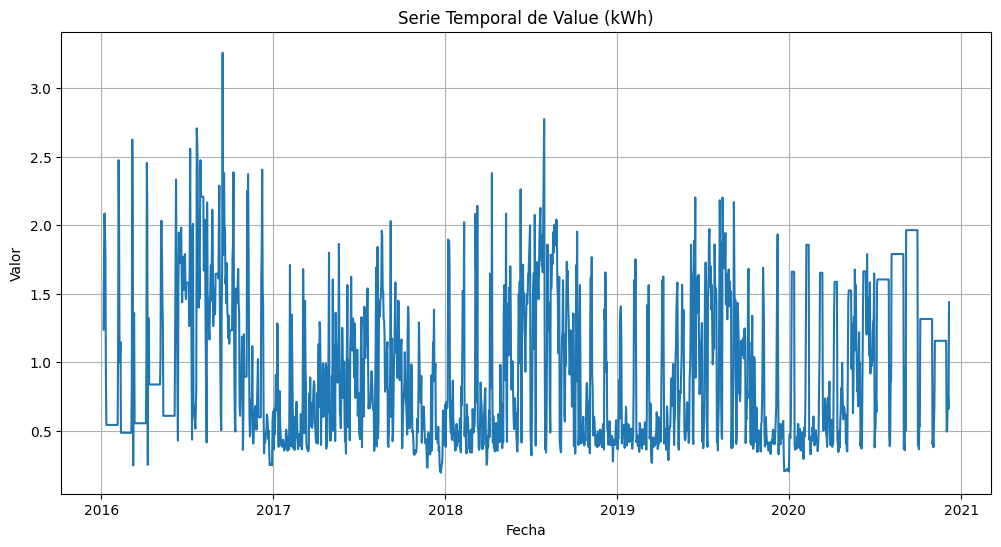

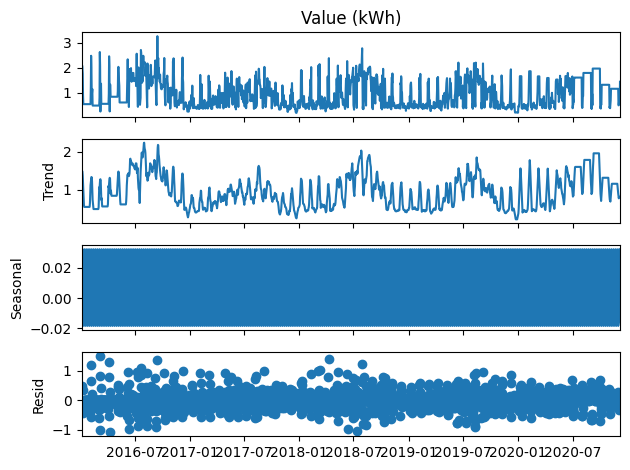

Resultados de la prueba de Dickey-Fuller aumentada:
Estadística de prueba        -4.096144
p-valor                       0.000983
#Lags usados                 25.000000
Número de observaciones    1771.000000
Valor crítico (1%)           -3.434048
Valor crítico (5%)           -2.863173
Valor crítico (10%)          -2.567640
dtype: float64


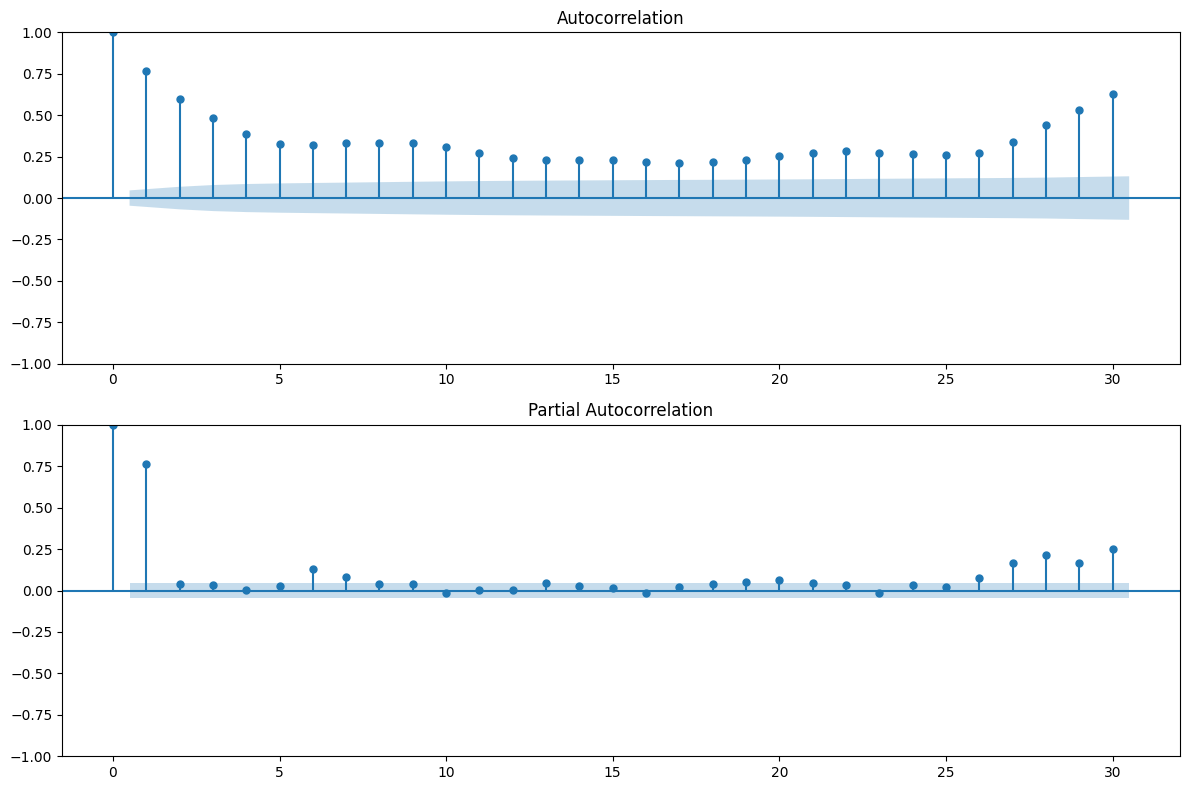

Nuevo mejor modelo AIC:5383.73 order:(0, 0, 0) seasonal_order:(0, 0, 0, 7)
Nuevo mejor modelo AIC:4366.62 order:(0, 0, 0) seasonal_order:(0, 0, 1, 7)
Nuevo mejor modelo AIC:3377.77 order:(0, 0, 0) seasonal_order:(0, 1, 0, 7)
Nuevo mejor modelo AIC:2531.11 order:(0, 0, 0) seasonal_order:(0, 1, 1, 7)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Nuevo mejor modelo AIC:2527.84 order:(0, 0, 0) seasonal_order:(1, 1, 1, 7)
Nuevo mejor modelo AIC:1760.48 order:(0, 0, 1) seasonal_order:(0, 1, 1, 7)
Nuevo mejor modelo AIC:1760.02 order:(0, 0, 1) seasonal_order:(1, 1, 1, 7)
Nuevo mejor modelo AIC:1531.76 order:(0, 0, 2) seasonal_order:(0, 1, 1, 7)
Nuevo mejor modelo AIC:1440.61 order:(0, 0, 3) seasonal_order:(0, 1, 1, 7)
Nuevo mejor modelo AIC:1408.59 order:(0, 1, 2) seasonal_order:(0, 0, 0, 7)
Nuevo mejor modelo AIC:1397.81 order:(0, 1, 2) seasonal_order:(0, 0, 1, 7)
Nuevo mejor modelo AIC:1397.43 order:(0, 1, 2) seasonal_order:(1, 0, 0, 7)
Nuevo mejor modelo AIC:1328.70 order:(0, 1, 3) seasonal_order:(0, 0, 0, 7)
Nuevo mejor modelo AIC:1321.51 order:(0, 1, 3) seasonal_order:(0, 0, 1, 7)
Nuevo mejor modelo AIC:1320.69 order:(0, 1, 3) seasonal_order:(1, 0, 0, 7)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Nuevo mejor modelo AIC:1255.70 order:(1, 1, 1) seasonal_order:(0, 0, 0, 7)
Nuevo mejor modelo AIC:1245.53 order:(1, 1, 1) seasonal_order:(0, 0, 1, 7)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Nuevo mejor modelo AIC:1244.45 order:(2, 1, 2) seasonal_order:(0, 0, 0, 7)
Nuevo mejor modelo AIC:1237.69 order:(2, 1, 2) seasonal_order:(0, 0, 1, 7)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op


Mejor modelo encontrado:
Orden: (2, 1, 2)
Orden estacional: (0, 0, 1, 7)
AIC: 1237.69
MSE: 0.4837, MAPE: 0.5448, R2: -0.5268


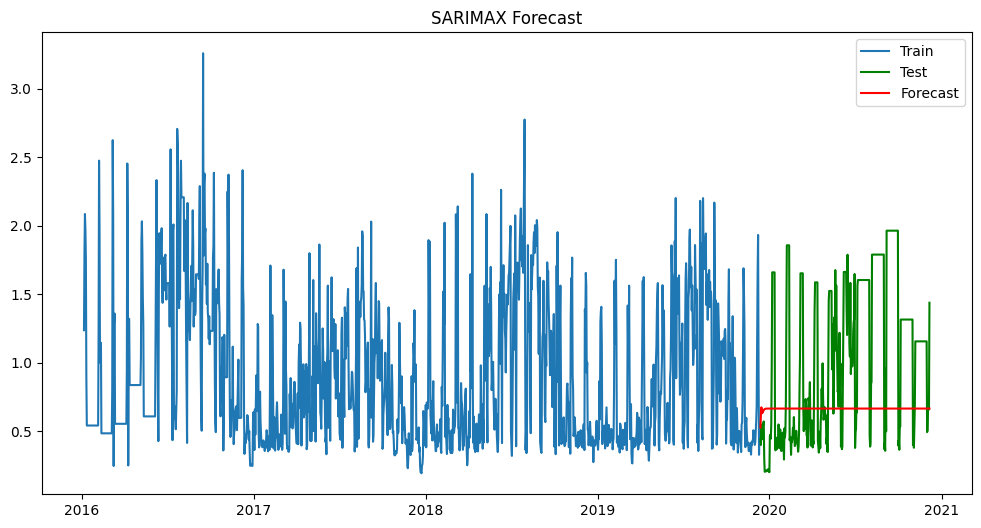

In [12]:
# Cargar datos
power_data_univariable = pd.read_csv('/content/drive/MyDrive/Proyecto Modelos/power_usage_2016_to_2020.csv', parse_dates=['StartDate'], index_col='StartDate')
power_data_univariable = power_data_univariable['Value (kWh)'].resample('D').mean()  # Convertir a frecuencia diaria
power_data_univariable = power_data_univariable.fillna(method='ffill')
print(power_data_univariable.isnull().sum())

# Análisis de serie univariada
ts_analysis = TimeSeriesAnalysis(power_data_univariable, 'Value (kWh)')

# Exploración de datos
ts_analysis.explore_data()
ts_analysis.test_stationarity()
ts_analysis.plot_acf_pacf(lags=30)

# Ajustar SARIMAX
best_order, best_seasonal_order = ts_analysis.find_best_sarimax(seasonal_period=7)  # Estacionalidad semanal
metrics, mse, mape, r2 = ts_analysis.fit_sarimax(order=best_order, seasonal_order=best_seasonal_order)

In [13]:
r2

-0.5267804551586639

# Análisis de estacionariedad y resultados del modelo SARIMAX

## Prueba de Dickey-Fuller Aumentada (ADF)

Se realizó la prueba ADF para verificar si la serie de consumo eléctrico es estacionaria:

| Métrica                  | Valor       |
|--------------------------|-------------|
| Estadística de prueba    | -4.0961     |
| p-valor                  | 0.00098     |
| Número de rezagos usados | 25          |
| Número de observaciones  | 1771        |
| Valor crítico (1%)       | -3.4340     |
| Valor crítico (5%)       | -2.8632     |
| Valor crítico (10%)      | -2.5676     |

*Interpretación:*  
El valor p es menor que 0.01 y la estadística de prueba es menor que el valor crítico del 1%, lo que indica que la serie es estacionaria con un alto nivel de confianza. Esto significa que las propiedades estadísticas del consumo eléctrico (media, varianza) no cambian con el tiempo, lo cual es favorable para modelar con métodos como SARIMAX.

---

## Resultados del modelo SARIMAX

•⁠  ⁠Mejor modelo encontrado:  
  - Orden (p, d, q): (2, 1, 2)  
  - Orden estacional (P, D, Q, S): (0, 0, 1, 7) — donde la estacionalidad es semanal (periodo 7)  
•⁠  ⁠Métricas de evaluación:  
  - AIC (criterio de información de Akaike): 1237.69  
  - MSE: 0.4837  
  - MAPE: 0.5448  
  - R2: -0.5268  

*Interpretación:*  
Aunque el modelo SARIMAX toma en cuenta la estacionalidad semanal y la diferencia necesaria para la estacionariedad, su desempeño es limitado en este caso. El R2 negativo indica que el modelo no logra explicar bien la variabilidad del consumo eléctrico, y el error MSE y MAPE son relativamente altos comparados con modelos de redes neuronales.

Esto puede deberse a que la serie, aunque estacionaria, tiene patrones complejos y no lineales — como cambios debidos al clima, horarios de uso de dispositivos, y días especiales (COVID, vacaciones) — que modelos clásicos como SARIMAX no capturan completamente.

---

## Conclusión

•⁠  ⁠La serie de consumo eléctrico es estacionaria, lo que permite usar modelos como SARIMAX.  
•⁠  ⁠Sin embargo, SARIMAX con la configuración seleccionada tiene un desempeño pobre en comparación con modelos basados en aprendizaje profundo (LSTM, MLP), probablemente porque no captura patrones no lineales ni múltiples variables externas.  
•⁠  ⁠Para mejorar la predicción, es recomendable usar modelos que puedan incorporar variables adicionales y relaciones complejas, como redes neuronales recurrentes.


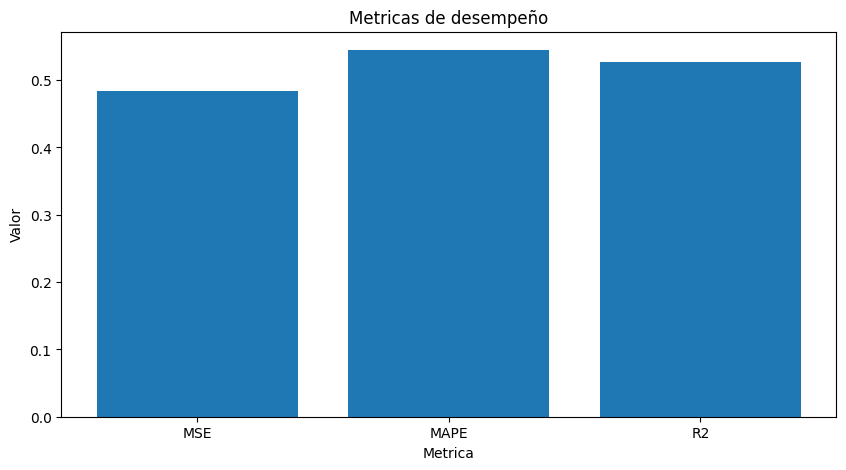

In [14]:
# Barplot con mse, mape, r2
plt.figure(figsize=(10, 5))
plt.ylabel('Valor')
plt.xlabel('Metrica')
plt.title('Metricas de desempeño')
plt.bar(['MSE', 'MAPE', 'R2'], [np.abs(mse), np.abs(mape), np.abs(r2)])
plt.show()


In [76]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Stats and time series analysis
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Evaluation metrics
from sklearn.metrics import (
    mean_squared_error, mean_absolute_percentage_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# ML models for classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, LSTM, Conv1D, MaxPooling1D, Flatten,
    Dropout, BatchNormalization, Input, Concatenate,
    ConvLSTM2D, Reshape, TimeDistributed
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Hyperparameter optimization
import optuna
from optuna.integration import TFKerasPruningCallback


def create_sequences(data, n_steps_in, n_steps_out=1, is_multivariate=False):
    """
    Create sequences for time series forecasting.

    Parameters:
    data : DataFrame or Series
        Input time series data
    n_steps_in : int
        Number of time steps for input (lookback window)
    n_steps_out : int
        Number of time steps to predict (forecast horizon)
    is_multivariate : bool
        Whether the data is multivariate

    Returns:
    X, y : arrays
        Sequences for input and target
    """
    X, y = [], []

    if is_multivariate:
        # For multivariate data
        for i in range(len(data) - n_steps_in - n_steps_out + 1):
            X.append(data.iloc[i:(i + n_steps_in)].values)
            y.append(data.iloc[(i + n_steps_in):(i + n_steps_in + n_steps_out), 0].values)
    else:
        # For univariate data
        for i in range(len(data) - n_steps_in - n_steps_out + 1):
            X.append(data.iloc[i:(i + n_steps_in)].values)
            y.append(data.iloc[(i + n_steps_in):(i + n_steps_in + n_steps_out)].values)

    return np.array(X), np.array(y)


def prepare_data_for_nn(data, n_steps_in=7, n_steps_out=1, test_size=0.2, is_multivariate=False):
    """
    Prepare data for neural network models.

    Parameters:
    data : DataFrame or Series
        Input time series data
    n_steps_in : int
        Number of time steps for input (lookback window)
    n_steps_out : int
        Number of time steps to predict (forecast horizon)
    test_size : float
        Proportion of data to use for testing
    is_multivariate : bool
        Whether the data is multivariate

    Returns:
    X_train, X_test, y_train, y_test, scaler : arrays and scaler object
        Prepared data for training and testing
    """
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    if is_multivariate:
        scaled_data = scaler.fit_transform(data)
        scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)
    else:
        scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
        scaled_data = pd.Series(scaled_data.flatten(), index=data.index)

    # Create sequences
    X, y = create_sequences(scaled_data, n_steps_in, n_steps_out, is_multivariate)

    # Split into train and test sets
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Reshape for CNN models if univariate
    if not is_multivariate:
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    return X_train, X_test, y_train, y_test, scaler

def prepare_data_for_lstm(data, n_steps_in=7, n_steps_out=1, test_size=0.2, is_multivariate=False):
    """
    Function to prepare the data for an lstm
    """


class NeuralNetworkModels:
    """
    Class for implementing various neural network models for time series forecasting.
    """
    def __init__(self, input_shape, output_shape):
        """
        Initialize the class with input and output shapes.

        Parameters:
        input_shape : tuple
            Shape of input data
        output_shape : int
            Number of output units
        """
        self.input_shape = input_shape
        self.output_shape = output_shape

    def build_mlp(self, architecture_id=1):
        """
        Build MLP model with different architectures.

        Parameters:
        architecture_id : int
            ID of the architecture to use (1, 2, or 3)

        Returns:
        model : Keras model
            Compiled MLP model
        """
        model = Sequential()

        if architecture_id == 1:
            # Architecture 1: Simple MLP
            model.add(Flatten(input_shape=self.input_shape))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(32, activation='relu'))
            model.add(Dense(self.output_shape))

        elif architecture_id == 2:
            # Architecture 2: Deeper MLP with dropout
            model.add(Flatten(input_shape=self.input_shape))
            model.add(Dense(128, activation='relu'))
            model.add(Dropout(0.2))
            model.add(Dense(64, activation='relu'))
            model.add(Dropout(0.2))
            model.add(Dense(32, activation='relu'))
            model.add(Dense(self.output_shape))

        elif architecture_id == 3:
            # Architecture 3: Wide MLP with batch normalization
            model.add(Flatten(input_shape=self.input_shape))
            model.add(Dense(256, activation='relu'))
            model.add(BatchNormalization())
            model.add(Dense(128, activation='relu'))
            model.add(BatchNormalization())
            model.add(Dense(64, activation='relu'))
            model.add(Dense(self.output_shape))

        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model

    def build_cnn(self, architecture_id=1):
        """
        Build CNN model with different architectures.

        Parameters:
        architecture_id : int
            ID of the architecture to use (1, 2, or 3)

        Returns:
        model : Keras model
            Compiled CNN model
        """
        model = Sequential()

        if architecture_id == 1:
            # Architecture 1: Simple CNN
            model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=self.input_shape))
            model.add(MaxPooling1D(pool_size=2))
            model.add(Flatten())
            model.add(Dense(50, activation='relu'))
            model.add(Dense(self.output_shape))

        elif architecture_id == 2:
            # Architecture 2: Deeper CNN
            model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=self.input_shape))
            model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
            model.add(MaxPooling1D(pool_size=2))
            model.add(Flatten())
            model.add(Dense(100, activation='relu'))
            model.add(Dense(self.output_shape))

        elif architecture_id == 3:
            # Architecture 3: CNN with dropout and batch normalization
            model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=self.input_shape))
            model.add(BatchNormalization())
            model.add(MaxPooling1D(pool_size=2))
            model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
            model.add(BatchNormalization())
            model.add(MaxPooling1D(pool_size=2))
            model.add(Flatten())
            model.add(Dense(100, activation='relu'))
            model.add(Dropout(0.2))
            model.add(Dense(self.output_shape))

        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model

    def build_lstm(self, architecture_id=1):
        """
        Build LSTM model with different architectures.

        Parameters:
        architecture_id : int
            ID of the architecture to use (1, 2, or 3)

        Returns:
        model : Keras model
            Compiled LSTM model
        """
        model = Sequential()

        if architecture_id == 1:
            # Architecture 1: Simple LSTM
            model.add(LSTM(50, activation='relu', input_shape=self.input_shape))
            model.add(Dense(self.output_shape))

        elif architecture_id == 2:
            # Architecture 2: Deeper LSTM
            model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=self.input_shape))
            model.add(LSTM(50, activation='relu'))
            model.add(Dense(self.output_shape))

        elif architecture_id == 3:
            # Architecture 3: LSTM with dropout and batch normalization
            model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=self.input_shape))
            model.add(Dropout(0.2))
            model.add(BatchNormalization())
            model.add(LSTM(50, activation='relu'))
            model.add(Dropout(0.2))
            model.add(BatchNormalization())
            model.add(Dense(25, activation='relu'))
            model.add(Dense(self.output_shape))

        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model

    def build_conv_lstm(self, architecture_id=1):
        """
        Build Conv-LSTM model with different architectures.

        Parameters:
        architecture_id : int
            ID of the architecture to use (1, 2, or 3)

        Returns:
        model : Keras model
            Compiled Conv-LSTM model
        """
        # For Conv-LSTM, we need to reshape the input
        # from [samples, time_steps, features] to [samples, time_steps, 1, 1, features]
        input_shape = (self.input_shape[0], 1, 1, self.input_shape[1])

        model = Sequential()

        if architecture_id == 1:
            # Architecture 1: Simple Conv-LSTM
            model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu',
                                input_shape=input_shape, return_sequences=False))
            model.add(Flatten())
            model.add(Dense(self.output_shape))

        elif architecture_id == 2:
            # Architecture 2: Deeper Conv-LSTM
            model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu',
                                input_shape=input_shape, return_sequences=True))
            model.add(ConvLSTM2D(filters=32, kernel_size=(1,1), activation='relu', return_sequences=False))
            model.add(Flatten())
            model.add(Dense(self.output_shape))

        elif architecture_id == 3:
            # Architecture 3: Conv-LSTM with dropout
            model.add(ConvLSTM2D(filters=128, kernel_size=(1,1), activation='relu',
                                input_shape=input_shape, return_sequences=True))
            model.add(Dropout(0.2))
            model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', return_sequences=False))
            model.add(Dropout(0.2))
            model.add(Flatten())
            model.add(Dense(50, activation='relu'))
            model.add(Dense(self.output_shape))

        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, scaler, model_name, architecture_id):
    """
    Train and evaluate a neural network model.

    Parameters:
    model : Keras model
        Model to train
    X_train, y_train, X_test, y_test : arrays
        Training and testing data
    scaler : scaler object
        Scaler used for data preprocessing
    model_name : str
        Name of the model
    architecture_id : int
        ID of the architecture used

    Returns:
    history : Keras history object
        Training history
    metrics : dict
        Evaluation metrics
    """
    # Callbacks for training
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.0001,
        verbose=1
    )

    # Start MLflow run
    with mlflow.start_run(run_name=f"{model_name}_arch{architecture_id}"):
        # Log parameters
        mlflow.log_param("model_type", model_name)
        mlflow.log_param("architecture_id", architecture_id)
        mlflow.log_param("input_shape", X_train.shape[1:])
        mlflow.log_param("output_shape", y_train.shape[1] if len(y_train.shape) > 1 else 1)

        # Train the model
        history = model.fit(
            X_train, y_train,
            epochs=100,
            batch_size=32,
            validation_split=0.2,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        # Make predictions
        y_pred = model.predict(X_test)

        # Inverse transform predictions and actual values
        if len(y_test.shape) == 2:
            y_test_inv = scaler.inverse_transform(np.hstack((y_test, np.zeros((y_test.shape[0], scaler.scale_.shape[0] - 1)))))[:, 0]
            y_pred_inv = scaler.inverse_transform(np.hstack((y_pred, np.zeros((y_pred.shape[0], scaler.scale_.shape[0] - 1)))))[:, 0]
        else:
            y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
            y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

        # Calculate metrics
        mse = mean_squared_error(y_test_inv, y_pred_inv)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
        r2 = r2_score(y_test_inv, y_pred_inv)

        # Log metrics
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mape", mape)
        mlflow.log_metric("r2", r2)

        # Log model
        mlflow.keras.log_model(model, f"{model_name}_arch{architecture_id}")

        # Create and log plots
        plt.figure(figsize=(12, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Loss Curves - {model_name} Architecture {architecture_id}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"{model_name}_arch{architecture_id}_loss.png")
        mlflow.log_artifact(f"{model_name}_arch{architecture_id}_loss.png")
        plt.close()

        plt.figure(figsize=(12, 6))
        plt.plot(y_test_inv, label='Actual')
        plt.plot(y_pred_inv, label='Predicted')
        plt.title(f'Predictions vs Actual - {model_name} Architecture {architecture_id}')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"{model_name}_arch{architecture_id}_predictions.png")
        mlflow.log_artifact(f"{model_name}_arch{architecture_id}_predictions.png")
        plt.close()

        # Return metrics
        metrics = {
            'mse': mse,
            'rmse': rmse,
            'mape': mape,
            'r2': r2
        }

        return history, metrics, y_test_inv, y_pred_inv

def optimize_model_with_optuna(model_type, X_train, y_train, X_test, y_test, scaler, n_trials=50):
    """
    Optimize model hyperparameters using Optuna.

    Parameters:
    model_type : str
        Type of model to optimize ('mlp', 'cnn', 'lstm', or 'conv_lstm')
    X_train, y_train, X_test, y_test : arrays
        Training and testing data
    scaler : scaler object
        Scaler used for data preprocessing
    n_trials : int
        Number of optimization trials

    Returns:
    best_model : Keras model
        Best model found
    best_params : dict
        Best hyperparameters
    """
    def create_model(trial):
        """Create model with trial parameters."""
        if model_type == 'mlp':
            n_layers = trial.suggest_int('n_layers', 1, 5)
            model = Sequential()
            model.add(Flatten(input_shape=X_train.shape[1:]))

            for i in range(n_layers):
                n_units = trial.suggest_int(f'n_units_l{i}', 32, 512)
                model.add(Dense(n_units, activation='relu'))

                if trial.suggest_categorical(f'use_bn_l{i}', [True, False]):
                    model.add(BatchNormalization())

                dropout_rate = trial.suggest_float(f'dropout_l{i}', 0.0, 0.5)
                if dropout_rate > 0:
                    model.add(Dropout(dropout_rate))

            model.add(Dense(y_train.shape[1] if len(y_train.shape) > 1 else 1))

        elif model_type == 'cnn':
            n_conv_layers = trial.suggest_int('n_conv_layers', 1, 3)
            model = Sequential()

            for i in range(n_conv_layers):
                if i == 0:
                    model.add(Conv1D(
                        filters=trial.suggest_int(f'filters_l{i}', 32, 256),
                        kernel_size=trial.suggest_int(f'kernel_size_l{i}', 2, 5),
                        activation='relu',
                        input_shape=X_train.shape[1:]
                    ))
                else:
                    model.add(Conv1D(
                        filters=trial.suggest_int(f'filters_l{i}', 32, 256),
                        kernel_size=trial.suggest_int(f'kernel_size_l{i}', 2, 5),
                        activation='relu'
                    ))

                if trial.suggest_categorical(f'use_bn_l{i}', [True, False]):
                    model.add(BatchNormalization())

                if trial.suggest_categorical(f'use_pool_l{i}', [True, False]):
                    model.add(MaxPooling1D(pool_size=2))

            model.add(Flatten())

            n_dense_layers = trial.suggest_int('n_dense_layers', 1, 3)
            for i in range(n_dense_layers):
                model.add(Dense(
                    trial.suggest_int(f'dense_units_l{i}', 32, 256),
                    activation='relu'
                ))

                dropout_rate = trial.suggest_float(f'dropout_l{i}', 0.0, 0.5)
                if dropout_rate > 0:
                    model.add(Dropout(dropout_rate))

            model.add(Dense(y_train.shape[1] if len(y_train.shape) > 1 else 1))

        elif model_type == 'lstm':
            n_lstm_layers = trial.suggest_int('n_lstm_layers', 1, 3)
            model = Sequential()

            for i in range(n_lstm_layers):
                return_sequences = i < n_lstm_layers - 1
                if i == 0:
                    model.add(LSTM(
                        trial.suggest_int(f'lstm_units_l{i}', 32, 256),
                        activation='relu',
                        return_sequences=return_sequences,
                        input_shape=X_train.shape[1:]
                    ))
                else:
                    model.add(LSTM(
                        trial.suggest_int(f'lstm_units_l{i}', 32, 256),
                        activation='relu',
                        return_sequences=return_sequences
                    ))

                if trial.suggest_categorical(f'use_bn_l{i}', [True, False]):
                    model.add(BatchNormalization())

                dropout_rate = trial.suggest_float(f'dropout_l{i}', 0.0, 0.5)
                if dropout_rate > 0:
                    model.add(Dropout(dropout_rate))

            n_dense_layers = trial.suggest_int('n_dense_layers', 0, 2)
            for i in range(n_dense_layers):
                model.add(Dense(
                    trial.suggest_int(f'dense_units_l{i}', 16, 128),
                    activation='relu'
                ))

            model.add(Dense(y_train.shape[1] if len(y_train.shape) > 1 else 1))

        elif model_type == 'conv_lstm':
            # Reshape input for ConvLSTM2D
            input_shape = (X_train.shape[1], 1, 1, X_train.shape[2] if len(X_train.shape) > 2 else 1)

            n_convlstm_layers = trial.suggest_int('n_convlstm_layers', 1, 2)
            model = Sequential()

            for i in range(n_convlstm_layers):
                return_sequences = i < n_convlstm_layers - 1
                if i == 0:
                    model.add(ConvLSTM2D(
                        filters=trial.suggest_int(f'filters_l{i}', 32, 128),
                        kernel_size=(1, 1),
                        activation='relu',
                        return_sequences=return_sequences,
                        input_shape=input_shape
                    ))
                else:
                    model.add(ConvLSTM2D(
                        filters=trial.suggest_int(f'filters_l{i}', 32, 128),
                        kernel_size=(1, 1),
                        activation='relu',
                        return_sequences=return_sequences
                    ))

                dropout_rate = trial.suggest_float(f'dropout_l{i}', 0.0, 0.5)
                if dropout_rate > 0:
                    model.add(Dropout(dropout_rate))

            model.add(Flatten())

            n_dense_layers = trial.suggest_int('n_dense_layers', 0, 2)
            for i in range(n_dense_layers):
                model.add(Dense(
                    trial.suggest_int(f'dense_units_l{i}', 16, 128),
                    activation='relu'
                ))

            model.add(Dense(y_train.shape[1] if len(y_train.shape) > 1 else 1))

        # Compile model
        learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
        model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss='mse',
            metrics=['mae']
        )

        return model

    def objective(trial):
        """Objective function for Optuna optimization."""
        # Create and compile model
        model = create_model(trial)

        # Callbacks
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )

        pruning_callback = TFKerasPruningCallback(trial, 'val_loss')

        # Train model
        history = model.fit(
            X_train, y_train,
            epochs=100,
            batch_size=trial.suggest_categorical('batch_size', [16, 32, 64, 128]),
            validation_split=0.2,
            callbacks=[early_stopping, pruning_callback],
            verbose=0
        )

        # Evaluate model
        y_pred = model.predict(X_test)

        # Inverse transform predictions and actual values
        if len(y_test.shape) == 2:
            y_test_inv = scaler.inverse_transform(np.hstack((y_test, np.zeros((y_test.shape[0], scaler.scale_.shape[0] - 1)))))[:, 0]
            y_pred_inv = scaler.inverse_transform(np.hstack((y_pred, np.zeros((y_pred.shape[0], scaler.scale_.shape[0] - 1)))))[:, 0]
        else:
            y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
            y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

        # Calculate metrics
        mse = mean_squared_error(y_test_inv, y_pred_inv)

        return mse

    # Create study
    study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner())
    study.optimize(objective, n_trials=n_trials)

    # Get best parameters
    best_params = study.best_params
    print(f"Best parameters: {best_params}")
    print(f"Best MSE: {study.best_value}")

    # Create and train best model
    with mlflow.start_run(run_name=f"{model_type}_optimized"):
        # Log best parameters
        for param_name, param_value in best_params.items():
            mlflow.log_param(param_name, param_value)

        # Create best model
        best_trial = study.best_trial
        best_model = create_model(best_trial)

        # Callbacks for training
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True,
            verbose=1
        )

        reduce_lr = ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=5,
            min_lr=0.0001,
            verbose=1
        )

        # Train best model
        history = best_model.fit(
            X_train, y_train,
            epochs=200,  # Train longer for best model
            batch_size=best_params['batch_size'],
            validation_split=0.2,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        # Make predictions
        y_pred = best_model.predict(X_test)

### 2. Modelos neuronales para series de tiempo

- Desarrollar e implementar los siguientes modelos para el pronóstico de la serie:
  - **Multilayer Perceptron (MLP)**
  - **Convolutional Neural Network (CNN)**
  - **Long Short-Term Memory (LSTM)**
  - **Conv-LSTM**

- Implementar cada uno de los modelos anteriores **tanto para el caso univariado como multivariado**.
- Comparar el desempeño de los modelos neuronales **univariados vs. multivariados**.
- Comparar el desempeño de los modelos neuronales **univariados** con el modelo **lineal clásico**. Crear gráficas donde se evidencie la predicción en el conjunto de test tanto del modelo lineal como no lineal

> Seleccionar al menos 3 estructuras de cada modelo. De todo el conjunto de modelos entrenados, seleccionar el modelo que obtuvo mejor rendimiento. A dicho modelo hacer una optimización parámetrica usando optuna. Recuerde que si usa callbacks como `EarlyStopping`, debe configurarse apropiadamente para permitir que el modelo se entrene una cantidad de épocas apropiadas.


## Univariables

In [15]:
power_data = power_data.set_index('StartDate')

numeric_cols = power_data.select_dtypes(include=[np.number]).columns

power_data = power_data[numeric_cols]

power_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34536 entries, 2016-06-06 00:00:00 to 2020-07-07 23:00:00
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Value (kWh)    34536 non-null  float64
 1   day_of_week_x  34536 non-null  int64  
 2   Day            34536 non-null  float64
 3   Temp_max       34536 non-null  float64
 4   Temp_avg       34536 non-null  float64
 5   Temp_min       34536 non-null  float64
 6   Dew_max        34536 non-null  float64
 7   Dew_avg        34536 non-null  float64
 8   Dew_min        34536 non-null  float64
 9   Hum_max        34536 non-null  float64
 10  Hum_avg        34536 non-null  float64
 11  Hum_min        34536 non-null  float64
 12  Wind_max       34536 non-null  float64
 13  Wind_avg       34536 non-null  float64
 14  Wind_min       34536 non-null  float64
 15  Press_max      34536 non-null  float64
 16  Press_avg      34536 non-null  float64
 17  Press_min      

**Multilayer Perceptron (MLP)**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_MLP1(input_shape, output_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(output_shape))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_MLP2(input_shape, output_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_shape))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_MLP3(input_shape, output_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(512, activation='tanh'))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='tanh'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(output_shape))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model




Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_34 (Flatten)            │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0337 - mae: 0.1320 - val_loss: 0.0142 - val_mae: 0.0874
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0178 - mae: 0.0932 - val_loss: 0.0130 - val_mae: 0.0821
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mae: 0.0880 - val_loss: 0.0122 - val_mae: 0.0805
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0167 - mae: 0.0930 - val_loss: 0.0126 - val_mae: 0.0791
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0163 - mae: 0.0873 - val_loss: 0.0135 - val_mae: 0.0828
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mae: 0.0845 - val_loss: 0.0120 - val_mae: 0.0814
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mae: 0.0855 - val_loss: 0.0119 - val_mae: 0.0799
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mae: 0.0809 - val_loss: 0.0125 - val_mae: 0.0798
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mae:

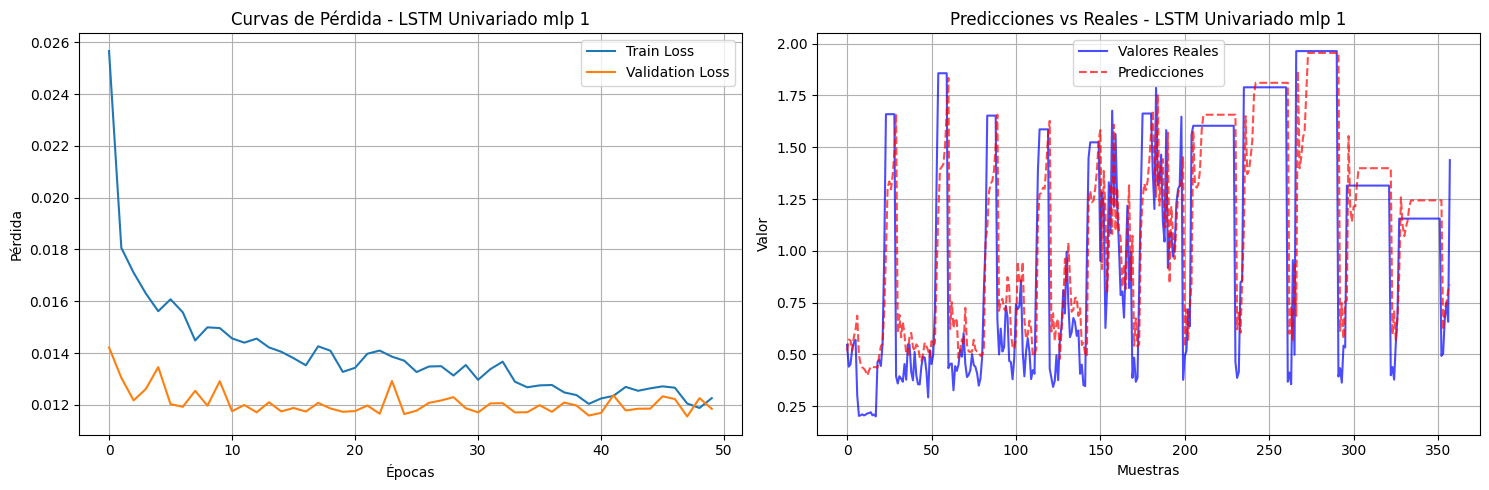

In [120]:

X_train, X_test, y_train, y_test, scaler = prepare_data_for_nn(power_data_univariable)

input_shape = (X_train.shape[1], X_train.shape[2])
output_shape = 1

# mlp Arquitectura 1
mlp1 = create_MLP1(input_shape, output_shape)
mlp1.summary()
mlp1_results = evaluate_model(mlp1, X_train, y_train, X_test, y_test, scaler, "LSTM Univariado mlp 1")


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_33 (Flatten)            │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,265 (169.00 KB)

 Trainable params: 43,265 (169.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0370 - mae: 0.1353 - val_loss: 0.0135 - val_mae: 0.0846
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mae: 0.0826 - val_loss: 0.0139 - val_mae: 0.0854
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mae: 0.0812 - val_loss: 0.0129 - val_mae: 0.0825
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - mae: 0.0869 - val_loss: 0.0128 - val_mae: 0.0817
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mae: 0.0840 - val_loss: 0.0120 - val_mae: 0.0792
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mae: 0.0782 - val_loss: 0.0144 - val_mae: 0.0871
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mae: 0.0784 - val_loss: 0.0115 - val_mae: 0.0783
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mae: 0.0766 - val_loss: 0.0122 - val_mae: 0.0807
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mae:

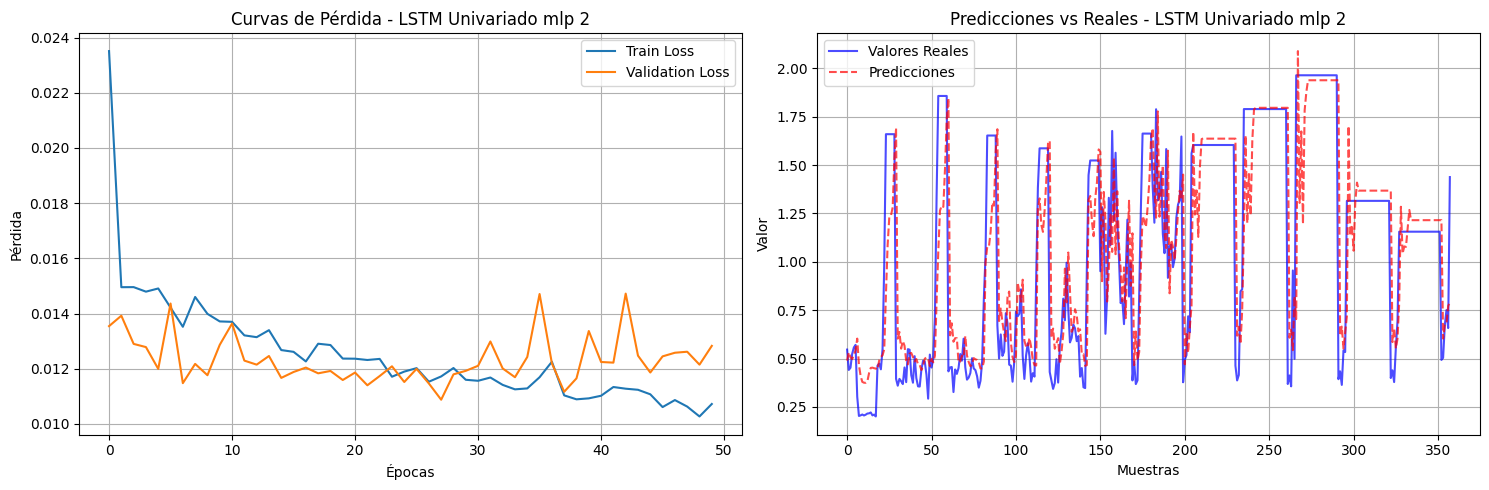

In [119]:
# mlp Arquitectura 2
mlp2 = create_MLP2(input_shape, output_shape)
mlp2.summary()
mlp3_results = evaluate_model(mlp2, X_train, y_train, X_test, y_test, scaler, "LSTM Univariado mlp 2")

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_30 (Flatten)            │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 512)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,449 (658.00 KB)

 Trainable params: 168,449 (658.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0336 - mae: 0.1300 - val_loss: 0.0130 - val_mae: 0.0873
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mae: 0.0892 - val_loss: 0.0135 - val_mae: 0.0873
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mae: 0.0879 - val_loss: 0.0135 - val_mae: 0.0867
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - mae: 0.0905 - val_loss: 0.0127 - val_mae: 0.0837
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mae: 0.0834 - val_loss: 0.0127 - val_mae: 0.0818
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mae: 0.0821 - val_loss: 0.0146 - val_mae: 0.0882
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mae: 0.0829 - val_loss: 0.0115 - val_mae: 0.0775
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mae: 0.0846 - val_loss: 0.0121 - val_mae: 0.0803
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - mae:

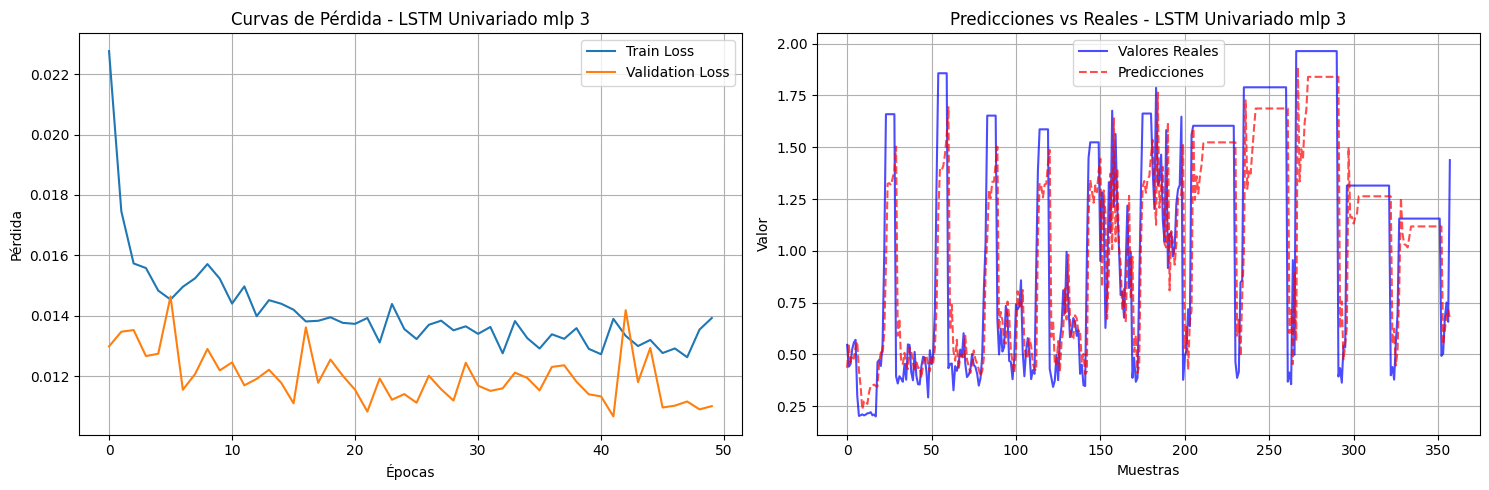

In [116]:
# mlp Arquitectura 3
mlp3 = create_MLP3(input_shape, output_shape)
mlp3.summary()
mlp3_results = evaluate_model(mlp3, X_train, y_train, X_test, y_test, scaler, "LSTM Univariado mlp 3")

**Convolutional Neural Network (CNN)**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam

def create_cnn1(input_shape, output_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(output_shape))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_cnn2(input_shape, output_shape):
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(output_shape))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_cnn3(input_shape, output_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(output_shape))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_38 (Conv1D)              │ (None, 5, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_34 (MaxPooling1D) │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_35 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,757 (26.39 KB)

 Trainable params: 6,757 (26.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0338 - mae: 0.1302 - val_loss: 0.0236 - val_mae: 0.1212
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mae: 0.1100 - val_loss: 0.0211 - val_mae: 0.1150
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0206 - mae: 0.1063 - val_loss: 0.0213 - val_mae: 0.1125
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mae: 0.1003 - val_loss: 0.0206 - val_mae: 0.1106
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212 - mae: 0.1064 - val_loss: 0.0208 - val_mae: 0.1100
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - mae: 0.1046 - val_loss: 0.0207 - val_mae: 0.1098
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 - mae: 0.1082 - val_loss: 0.0206 - val_mae: 0.1088
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - mae: 0.1038 - val_loss: 0.0201 - val_mae: 0.1100
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - mae:

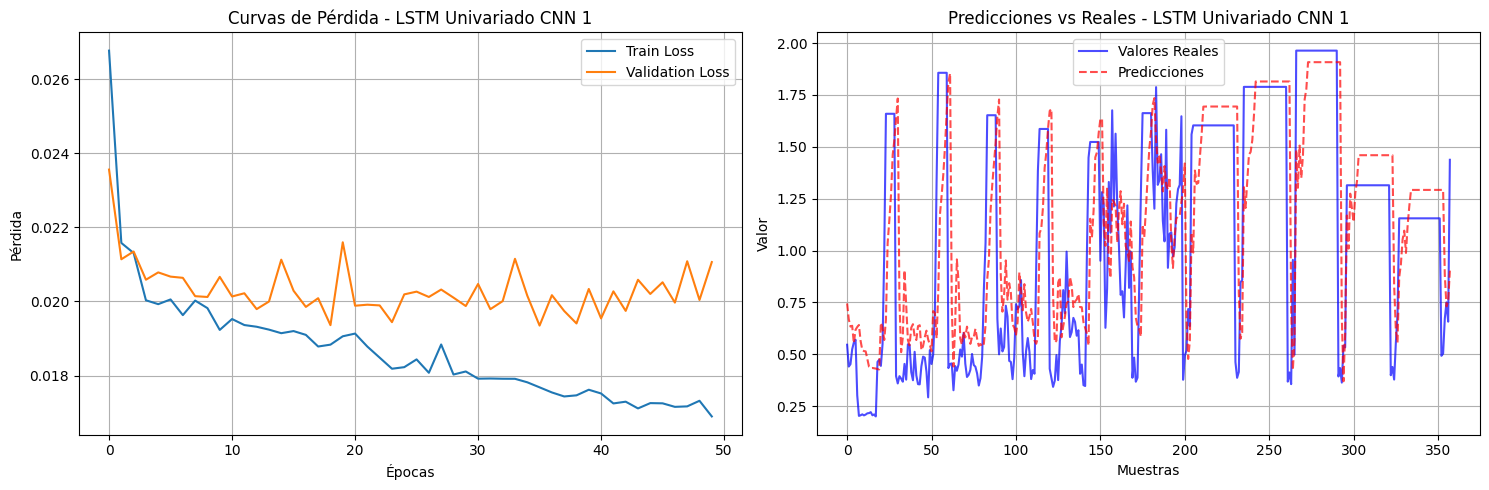

In [121]:
X_train, X_test, y_train, y_test, scaler = prepare_data_for_nn(power_data_univariable)

input_shape = (X_train.shape[1], X_train.shape[2])
output_shape = 1

# CNN Arquitectura 1
cnn1 = create_cnn1(input_shape, output_shape)
cnn1.summary()
cnn1_results = evaluate_model(cnn1, X_train, y_train, X_test, y_test, scaler, "LSTM Univariado CNN 1")

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_39 (Conv1D)              │ (None, 7, 128)         │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_35 (MaxPooling1D) │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_40 (Conv1D)              │ (None, 3, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_36 (MaxPooling1D) │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_36 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 100)            │         6,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,009 (125.04 KB)

 Trainable params: 32,009 (125.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0397 - mae: 0.1480 - val_loss: 0.0189 - val_mae: 0.1118
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 - mae: 0.1011 - val_loss: 0.0139 - val_mae: 0.0909
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - mae: 0.0886 - val_loss: 0.0127 - val_mae: 0.0822
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mae: 0.0802 - val_loss: 0.0122 - val_mae: 0.0856
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mae: 0.0859 - val_loss: 0.0122 - val_mae: 0.0795
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mae: 0.0835 - val_loss: 0.0118 - val_mae: 0.0796
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mae: 0.0790 - val_loss: 0.0117 - val_mae: 0.0779
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mae: 0.0818 - val_loss: 0.0129 - val_mae: 0.0814
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mae:

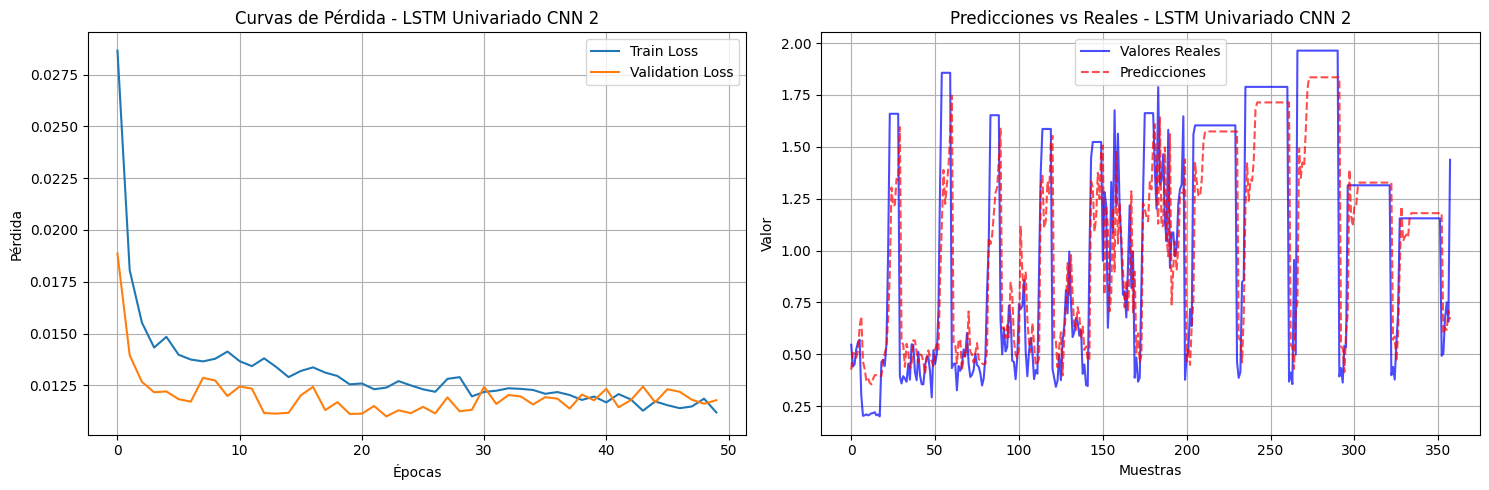

In [122]:
# CNN Arquitectura 2
cnn2 = create_cnn2(input_shape, output_shape)
cnn2.summary()
cnn2_results = evaluate_model(cnn2, X_train, y_train, X_test, y_test, scaler, "LSTM Univariado CNN 2")

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_44 (Conv1D)              │ (None, 7, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_45 (Conv1D)              │ (None, 7, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_39 (MaxPooling1D) │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_46 (Conv1D)              │ (None, 3, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_40 (MaxPooling1D) │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_38 (Flatten)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,137 (90.38 KB)

 Trainable params: 23,137 (90.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0335 - mae: 0.1346 - val_loss: 0.0210 - val_mae: 0.1184
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0210 - mae: 0.1075 - val_loss: 0.0165 - val_mae: 0.1020
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 - mae: 0.1000 - val_loss: 0.0128 - val_mae: 0.0857
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0176 - mae: 0.0940 - val_loss: 0.0133 - val_mae: 0.0881
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0164 - mae: 0.0892 - val_loss: 0.0129 - val_mae: 0.0874
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - mae: 0.0856 - val_loss: 0.0120 - val_mae: 0.0797
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0138 - mae: 0.0813 - val_loss: 0.0115 - val_mae: 0.0775
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0159 - mae: 0.0875 - val_loss: 0.0117 - val_mae: 0.0776
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - mae:

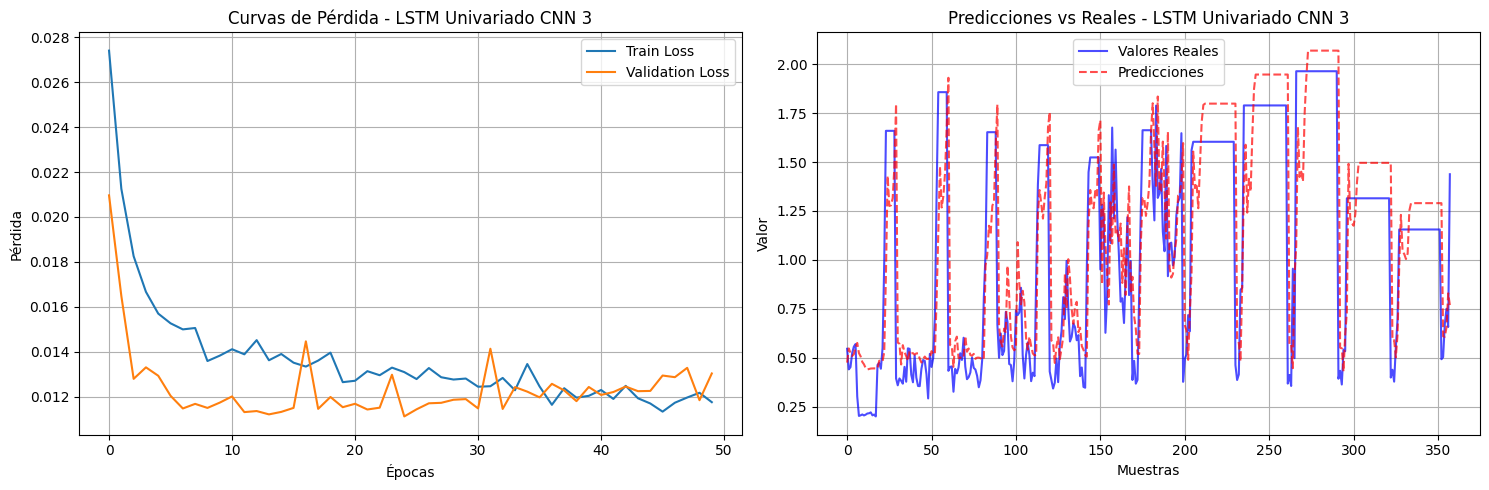

In [124]:
# CNN Arquitectura 3
cnn3 = create_cnn3(input_shape, output_shape)
cnn3.summary()
cnn3_results = evaluate_model(cnn3, X_train, y_train, X_test, y_test, scaler, "LSTM Univariado CNN 3")

**Long Short-Term Memory (LSTM)**

In [131]:
from tensorflow.keras.layers import LSTM

def create_lstm1(input_shape, output_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(output_shape))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_lstm2(input_shape, output_shape):
    model = Sequential()
    model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(LSTM(50, activation='tanh'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_shape))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_lstm3(input_shape, output_shape):
    model = Sequential()
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.4))
    model.add(LSTM(64, activation='relu', return_sequences=False))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(output_shape))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [109]:
X_train, X_test, y_train, y_test, scaler = prepare_data_for_nn(power_data_univariable)

input_shape = (X_train.shape[1], X_train.shape[2])
output_shape = 1



Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0567 - mae: 0.1750 - val_loss: 0.0219 - val_mae: 0.1250
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0211 - mae: 0.1145 - val_loss: 0.0198 - val_mae: 0.1143
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 - mae: 0.1046 - val_loss: 0.0197 - val_mae: 0.1121
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 - mae: 0.0989 - val_loss: 0.0189 - val_mae: 0.1080
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0172 - mae: 0.0965 - val_loss: 0.0185 - val_mae: 0.1064
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174 - mae: 0.0981 - val_loss: 0.0178 - val_mae: 0.1018
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0175 - mae: 0.0953 - val_loss: 0.0171 - val_mae: 0.1001
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - mae: 0.0860 - val_loss: 0.0172 - val_mae: 0.1014
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - mae:

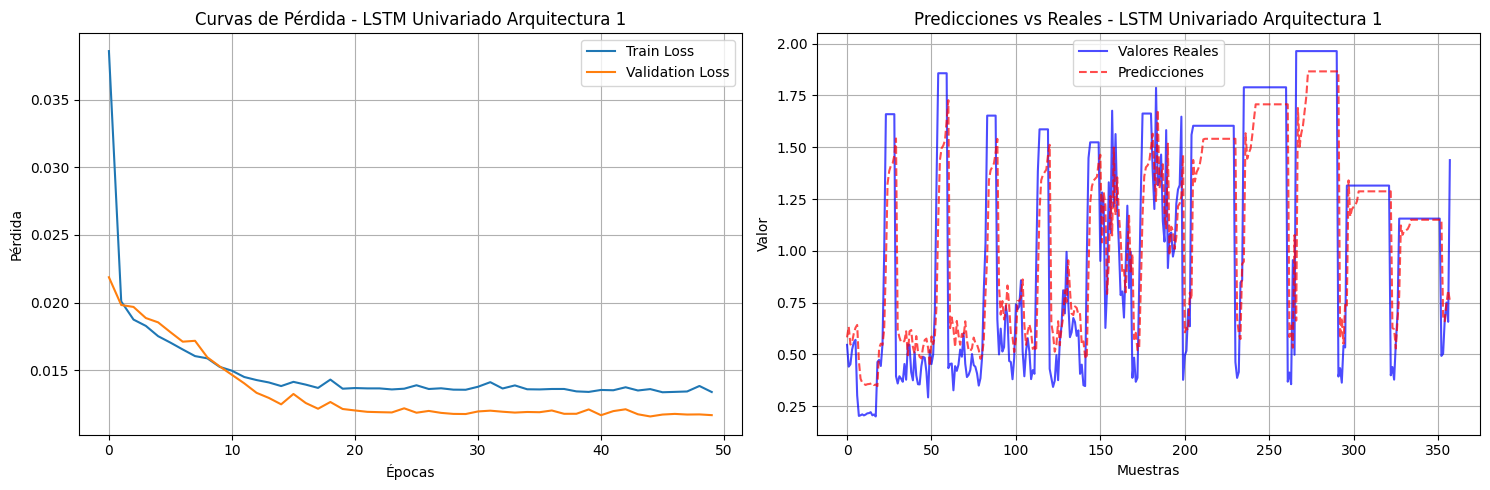

In [125]:
# LSTM Arquitectura 1
lstm1 = create_lstm1(input_shape, output_shape)
lstm1.summary()
lstm1_results = evaluate_model(lstm1, X_train, y_train, X_test, y_test, scaler, "LSTM Univariado Arquitectura 1")

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                  │ (None, 7, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 7, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,329 (290.35 KB)

 Trainable params: 74,329 (290.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0406 - mae: 0.1464 - val_loss: 0.0221 - val_mae: 0.1211
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0205 - mae: 0.1084 - val_loss: 0.0217 - val_mae: 0.1162
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0213 - mae: 0.1083 - val_loss: 0.0208 - val_mae: 0.1130
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0198 - mae: 0.1037 - val_loss: 0.0201 - val_mae: 0.1105
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0194 - mae: 0.1016 - val_loss: 0.0189 - val_mae: 0.1068
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0174 - mae: 0.0976 - val_loss: 0.0178 - val_mae: 0.1006
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0192 - mae: 0.0972 - val_loss: 0.0164 - val_mae: 0.0960
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0147 - mae: 0.0876 - val_loss: 0.0160 - val_mae: 0.0969
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0161 - mae:

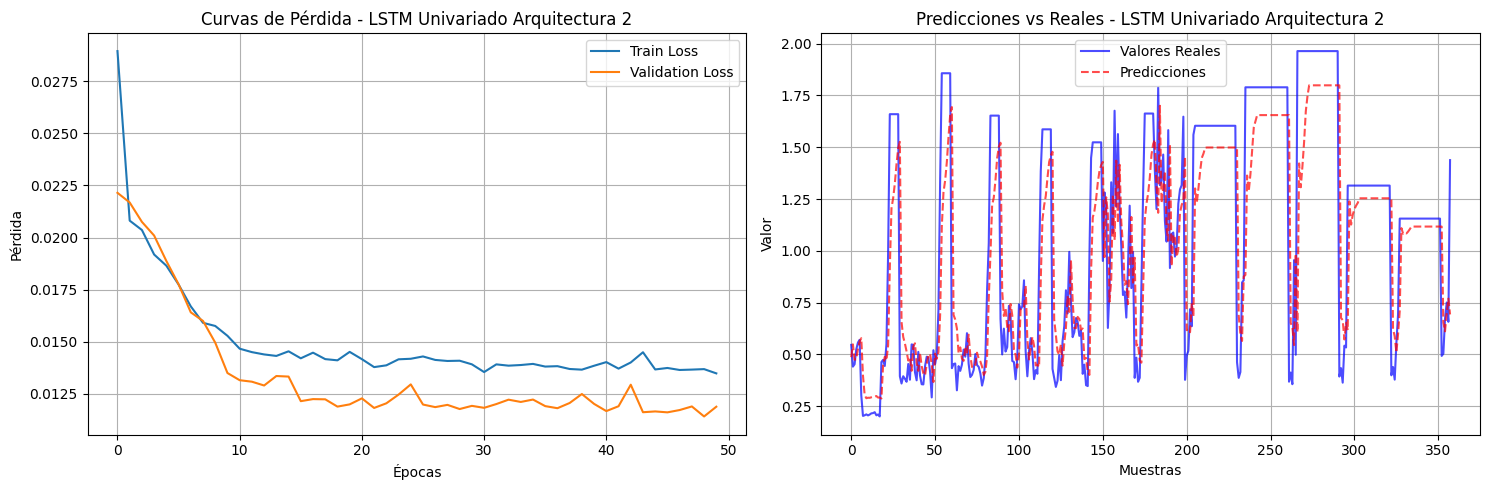

In [126]:
# LSTM Arquitectura 2
lstm2 = create_lstm2(input_shape, output_shape)
lstm2.summary()
lstm2_results = evaluate_model(lstm2, X_train, y_train, X_test, y_test, scaler, "LSTM Univariado Arquitectura 2")

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                  │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,417 (486.00 KB)

 Trainable params: 124,417 (486.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mae: 0.0806 - val_loss: 0.0118 - val_mae: 0.0764
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mae: 0.0745 - val_loss: 0.0116 - val_mae: 0.0773
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mae: 0.0821 - val_loss: 0.0116 - val_mae: 0.0784
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mae: 0.0777 - val_loss: 0.0117 - val_mae: 0.0764
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mae: 0.0831 - val_loss: 0.0118 - val_mae: 0.0764
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mae: 0.0756 - val_loss: 0.0128 - val_mae: 0.0792
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mae: 0.0766 - val_loss: 0.0117 - val_mae: 0.0792
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mae: 0.0763 - val_loss: 0.0117 - val_mae: 0.0768
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mae: 

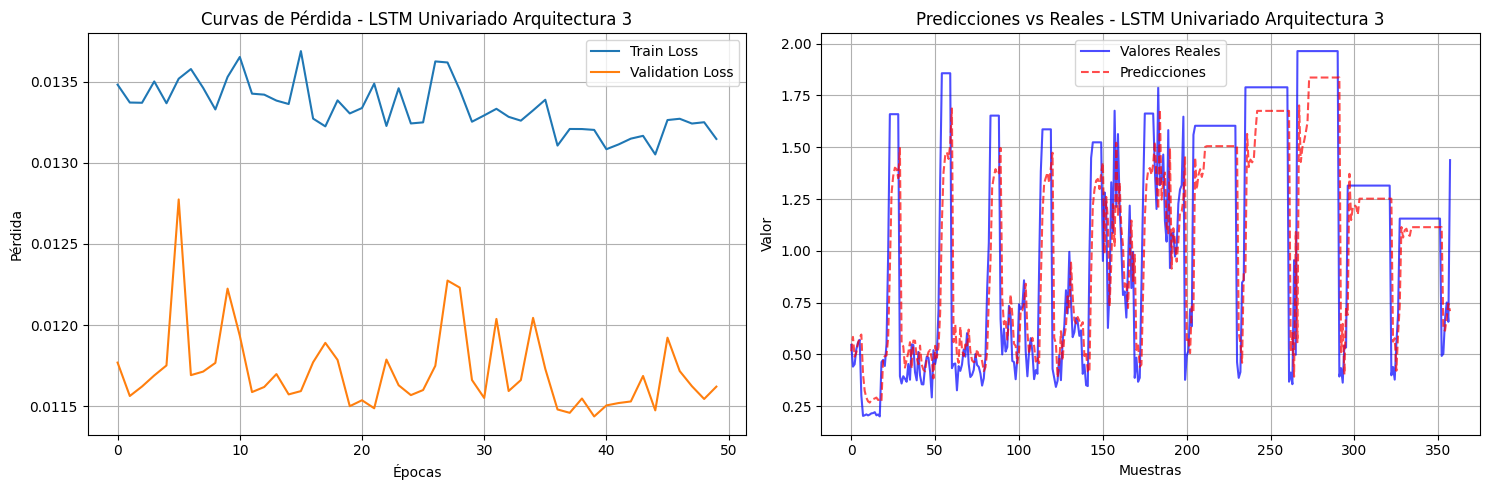

In [127]:
# LSTM Arquitectura 3
lstm3 = create_lstm3(input_shape, output_shape)
lstm3.summary()
lstm3_results = evaluate_model(lstm1, X_train, y_train, X_test, y_test, scaler, "LSTM Univariado Arquitectura 3")

**Conv-LSTM**

In [38]:
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Conv1D, MaxPooling1D, Flatten, LSTM, Dense

def create_cnn_lstm1(input_shape, output_shape):
    timesteps, features = input_shape
    model = Sequential()
    model.add(Reshape((1, timesteps, features), input_shape=input_shape))
    model.add(TimeDistributed(Conv1D(64, 3, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(output_shape))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_cnn_lstm2(input_shape, output_shape):
    timesteps, features = input_shape
    model = Sequential()
    model.add(Reshape((1, timesteps, features), input_shape=input_shape))
    model.add(TimeDistributed(Conv1D(128, 5, activation='relu', padding='same')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Conv1D(64, 3, activation='relu', padding='same')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(100, activation='tanh'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_shape))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_cnn_lstm3(input_shape, output_shape):
    timesteps, features = input_shape
    model = Sequential()
    model.add(Reshape((1, timesteps, features), input_shape=input_shape))
    model.add(TimeDistributed(Conv1D(64, 3, activation='relu', padding='same')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Dropout(0.3)))
    model.add(TimeDistributed(Conv1D(32, 3, activation='tanh', padding='same')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(64, activation='relu', return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(output_shape))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


def prepare_data_for_cnn_lstm(X_train, X_test):
    """
    Ensure data is properly shaped for CNN-LSTM model.

    Parameters:
    X_train, X_test : arrays
        Training and testing data

    Returns:
    X_train, X_test : arrays
        Reshaped training and testing data
    """
    # Make sure we have the right shape [samples, timesteps, features]
    if len(X_train.shape) == 2:
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    return X_train, X_test

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_6 (Reshape)             │ (None, 1, 7, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_28             │ (None, 1, 5, 64)       │           256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_29             │ (None, 1, 2, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_30             │ (None, 1, 128)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 50)             │        35,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,107 (141.04 KB)

 Trainable params: 36,107 (141.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0637 - mae: 0.1898 - val_loss: 0.0254 - val_mae: 0.1322
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0260 - mae: 0.1244 - val_loss: 0.0233 - val_mae: 0.1250
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0217 - mae: 0.1125 - val_loss: 0.0225 - val_mae: 0.1213
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - mae: 0.1128 - val_loss: 0.0219 - val_mae: 0.1182
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202 - mae: 0.1075 - val_loss: 0.0219 - val_mae: 0.1172
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0225 - mae: 0.1090 - val_loss: 0.0213 - val_mae: 0.1138
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0226 - mae: 0.1081 - val_loss: 0.0212 - val_mae: 0.1128
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - mae: 0.1070 - val_loss: 0.0217 - val_mae: 0.1153
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mae:

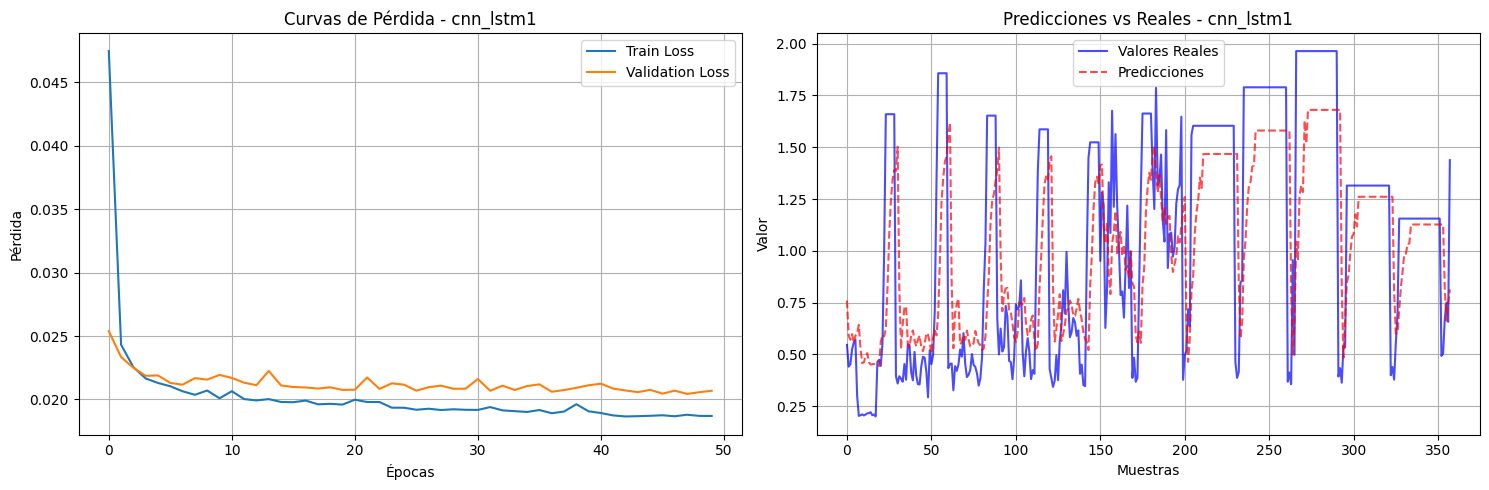

In [128]:
# cnn_lstm1 Arquitectura
cnn_lstm1 = create_cnn_lstm1(input_shape, output_shape)
cnn_lstm1.summary()
cnn_lstm1_results = evaluate_model(cnn_lstm1, X_train, y_train, X_test, y_test, scaler, "cnn_lstm1")

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_7 (Reshape)             │ (None, 1, 7, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_31             │ (None, 1, 7, 128)      │           768 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_32             │ (None, 1, 3, 128)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_33             │ (None, 1, 3, 64)       │        24,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_34             │ (None, 1, 1, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_35             │ (None, 1, 64)          │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ (None, 100)            │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,937 (382.57 KB)

 Trainable params: 97,937 (382.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0450 - mae: 0.1558 - val_loss: 0.0205 - val_mae: 0.1196
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0194 - mae: 0.1090 - val_loss: 0.0155 - val_mae: 0.0957
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0158 - mae: 0.0885 - val_loss: 0.0124 - val_mae: 0.0819
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0131 - mae: 0.0793 - val_loss: 0.0119 - val_mae: 0.0811
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0161 - mae: 0.0870 - val_loss: 0.0117 - val_mae: 0.0789
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0125 - mae: 0.0779 - val_loss: 0.0118 - val_mae: 0.0802
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mae: 0.0790 - val_loss: 0.0117 - val_mae: 0.0787
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0130 - mae: 0.0759 - val_loss: 0.0115 - val_mae: 0.0781
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0138 - ma

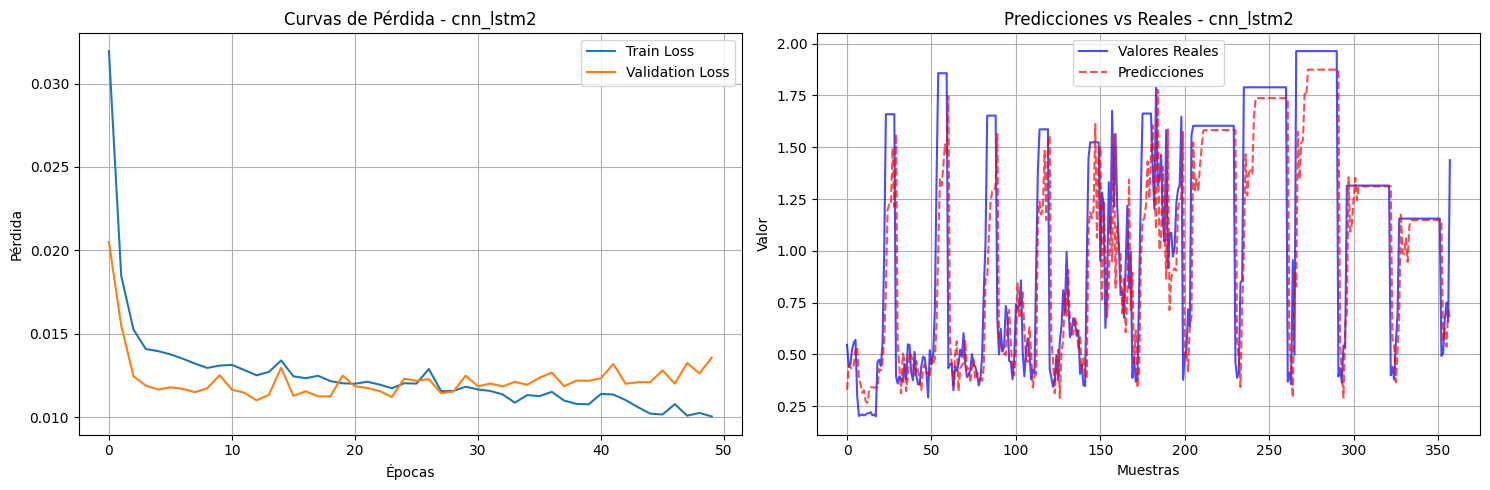

In [129]:
# cnn_lstm2 Arquitectura
cnn_lstm2 = create_cnn_lstm2(input_shape, output_shape)
cnn_lstm2.summary()
cnn_lstm2_results = evaluate_model(cnn_lstm2, X_train, y_train, X_test, y_test, scaler, "cnn_lstm2")

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_8 (Reshape)             │ (None, 1, 7, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_36             │ (None, 1, 7, 64)       │           256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_37             │ (None, 1, 3, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_38             │ (None, 1, 3, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_39             │ (None, 1, 3, 32)       │         6,176 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_40             │ (None, 1, 1, 32)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_41             │ (None, 1, 32)          │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,713 (155.13 KB)

 Trainable params: 39,713 (155.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0621 - mae: 0.1862 - val_loss: 0.0237 - val_mae: 0.1302
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0263 - mae: 0.1286 - val_loss: 0.0206 - val_mae: 0.1163
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0204 - mae: 0.1055 - val_loss: 0.0174 - val_mae: 0.1042
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186 - mae: 0.1010 - val_loss: 0.0146 - val_mae: 0.0919
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0163 - mae: 0.0928 - val_loss: 0.0139 - val_mae: 0.0915
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0167 - mae: 0.0929 - val_loss: 0.0139 - val_mae: 0.0896
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 - mae: 0.0948 - val_loss: 0.0132 - val_mae: 0.0851
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - mae: 0.0911 - val_loss: 0.0128 - val_mae: 0.0859
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - mae:

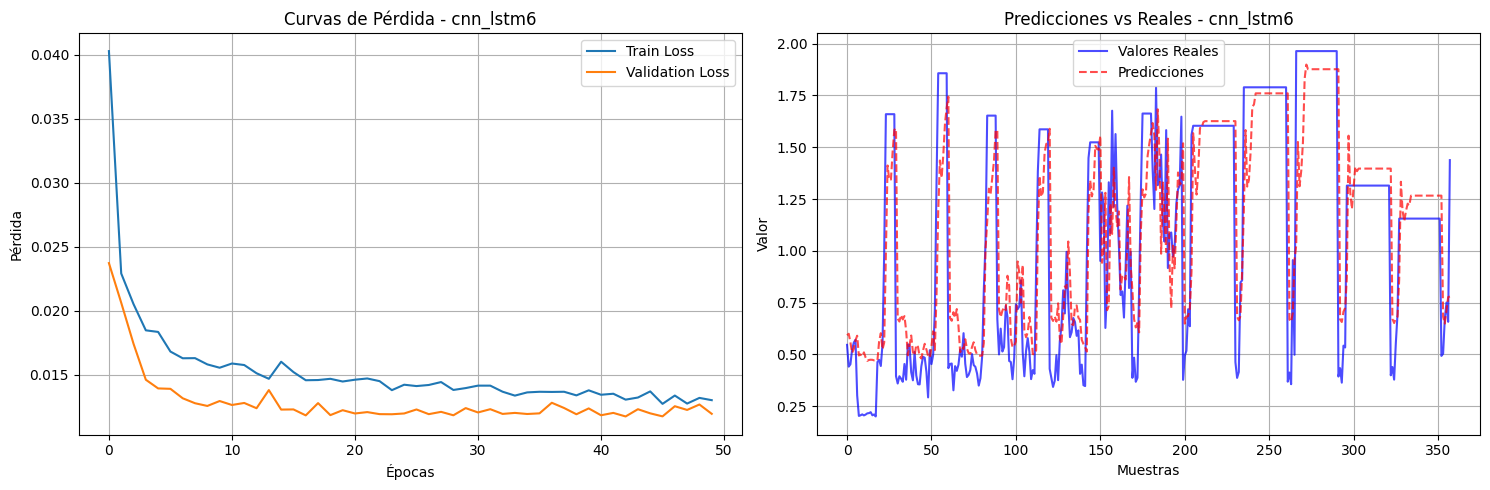

In [130]:
# cnn_lstm3 Arquitectura
cnn_lstm3 = create_cnn_lstm3(input_shape, output_shape)
cnn_lstm3.summary()
cnn_lstm3_results = evaluate_model(cnn_lstm3, X_train, y_train, X_test, y_test, scaler, "cnn_lstm6")

## Multivariable

In [42]:
from sklearn.preprocessing import MinMaxScaler

def prepare_data_for_nn(data, n_steps_in=7, n_steps_out=1, test_size=0.2, is_multivariate=False, target_col=None):
    """
    Prepara datos para redes neuronales (univariado o multivariado).

    Parámetros:
    - data: DataFrame o Series con la serie temporal
    - n_steps_in: pasos de entrada (ventana)
    - n_steps_out: pasos a predecir (horizonte)
    - test_size: proporción de prueba
    - is_multivariate: si hay múltiples features
    - target_col: nombre de la columna objetivo en multivariado

    Retorna:
    - X_train, X_test, y_train, y_test, scaler_X, scaler_y
    """
    if is_multivariate:
        if target_col is None:
            raise ValueError("Debes especificar 'target_col' en modo multivariado.")

        # Escalado
        scaler_X = MinMaxScaler()
        scaled_X = scaler_X.fit_transform(data)
        scaled_X_df = pd.DataFrame(scaled_X, columns=data.columns, index=data.index)

        scaler_y = MinMaxScaler()
        scaled_y = scaler_y.fit_transform(data[[target_col]])

        # Secuencias
        X, y = create_sequences(scaled_X_df, n_steps_in, n_steps_out, is_multivariate=True)

        # Manejo de formas de y (según cómo venga de create_sequences)
        if y.ndim == 3:
            target_idx = data.columns.get_loc(target_col)
            y = y[:, -1, target_idx]  # último paso de salida del target
        elif y.ndim == 2 and y.shape[1] > 1:
            target_idx = data.columns.get_loc(target_col)
            y = y[:, target_idx]  # una fila, muchas columnas (selecciona target)
        # Si y ya es (n_samples, 1), no se necesita nada
    else:
        # Univariado
        scaler_X = MinMaxScaler()
        scaled_data = scaler_X.fit_transform(data.values.reshape(-1, 1))
        scaled_data = pd.Series(scaled_data.flatten(), index=data.index)
        X, y = create_sequences(scaled_data, n_steps_in, n_steps_out, is_multivariate=False)
        scaler_y = scaler_X  # en univariado es lo mismo

    # Split
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Reshape CNN si es univariado
    if not is_multivariate:
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    return X_train, X_test, y_train, y_test, scaler_X, scaler_y

**Multilayer Perceptron (MLP)**

In [43]:
X_train, X_test, y_train, y_test, scaler_X, scaler_y = prepare_data_for_nn(
    power_data, is_multivariate=True, target_col='Value (kWh)'
)

input_shape = (X_train.shape[1], X_train.shape[2])
output_shape = 1

mlp = create_MLP1(input_shape, output_shape)
mlp.summary()

mlp.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

mlp.evaluate(X_test, y_test)

y_pred = mlp.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        18,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,369 (103.00 KB)

 Trainable params: 26,369 (103.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0367 - mae: 0.1240 - val_loss: 0.0099 - val_mae: 0.0600
Epoch 2/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0138 - mae: 0.0729 - val_loss: 0.0090 - val_mae: 0.0573
Epoch 3/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0119 - mae: 0.0669 - val_loss: 0.0109 - val_mae: 0.0605
Epoch 4/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0113 - mae: 0.0645 - val_loss: 0.0105 - val_mae: 0.0581
Epoch 5/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0108 - mae: 0.0635 - val_loss: 0.0085 - val_mae: 0.0561
Epoch 6/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0112 - mae: 0.0643 - val_loss: 0.0093 - val_mae: 0.0556
Epoch 7/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0109 - mae: 0.0632 - val_loss: 0.0086 - val_mae: 0.0588
Epoch 8/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0110 - mae: 0.0632 - val_loss: 0.0096 - val_mae: 0.0569
Epoch 9/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

In [44]:
mlp = create_MLP2(input_shape, output_shape)
mlp.summary()

mlp.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

mlp.evaluate(X_test, y_test)

y_pred = mlp.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │        36,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,313 (302.00 KB)

 Trainable params: 77,313 (302.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0232 - mae: 0.0993 - val_loss: 0.0100 - val_mae: 0.0716
Epoch 2/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0115 - mae: 0.0665 - val_loss: 0.0114 - val_mae: 0.0607
Epoch 3/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0110 - mae: 0.0643 - val_loss: 0.0088 - val_mae: 0.0574
Epoch 4/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0104 - mae: 0.0617 - val_loss: 0.0123 - val_mae: 0.0632
Epoch 5/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0102 - mae: 0.0608 - val_loss: 0.0100 - val_mae: 0.0562
Epoch 6/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0101 - mae: 0.0604 - val_loss: 0.0119 - val_mae: 0.0619
Epoch 7/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0104 - mae: 0.0607 - val_loss: 0.0125 - val_mae: 0.0651
Epoch 8/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0098 - mae: 0.0588 - val_loss: 0.0090 - val_mae: 0.0573
Epoch 9/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

In [45]:
mlp = create_MLP3(input_shape, output_shape)
mlp.summary()

mlp.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

mlp.evaluate(X_test, y_test)

y_pred = mlp.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 512)            │        72,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,545 (924.00 KB)

 Trainable params: 236,545 (924.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0560 - mae: 0.1499 - val_loss: 0.0137 - val_mae: 0.0672
Epoch 2/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0125 - mae: 0.0699 - val_loss: 0.0132 - val_mae: 0.0661
Epoch 3/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0110 - mae: 0.0650 - val_loss: 0.0086 - val_mae: 0.0547
Epoch 4/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0110 - mae: 0.0638 - val_loss: 0.0085 - val_mae: 0.0539
Epoch 5/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0109 - mae: 0.0639 - val_loss: 0.0085 - val_mae: 0.0535
Epoch 6/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0105 - mae: 0.0623 - val_loss: 0.0091 - val_mae: 0.0557
Epoch 7/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0110 - mae: 0.0642 - val_loss: 0.0087 - val_mae: 0.0547
Epoch 8/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0105 - mae: 0.0622 - val_loss: 0.0084 - val_mae: 0.0551
Epoch 9/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

**Convolutional Neural Network (CNN)**


In [46]:
X_train, X_test, y_train, y_test, scaler_X, scaler_y = prepare_data_for_nn(
    power_data, is_multivariate=True, target_col='Value (kWh)'
)
input_shape = (X_train.shape[1], X_train.shape[2])
output_shape = 1

cnn = create_cnn1(input_shape, output_shape)
cnn.summary()

cnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

cnn.evaluate(X_test, y_test)

y_pred = cnn.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)              │ (None, 5, 64)          │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,405 (40.64 KB)

 Trainable params: 10,405 (40.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0213 - mae: 0.0981 - val_loss: 0.0142 - val_mae: 0.0707
Epoch 2/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0158 - mae: 0.0799 - val_loss: 0.0134 - val_mae: 0.0831
Epoch 3/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0148 - mae: 0.0771 - val_loss: 0.0127 - val_mae: 0.0722
Epoch 4/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0152 - mae: 0.0771 - val_loss: 0.0133 - val_mae: 0.0703
Epoch 5/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0154 - mae: 0.0778 - val_loss: 0.0126 - val_mae: 0.0702
Epoch 6/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0154 - mae: 0.0781 - val_loss: 0.0125 - val_mae: 0.0708
Epoch 7/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0153 - mae: 0.0771 - val_loss: 0.0134 - val_mae: 0.0842
Epoch 8/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0155 - mae: 0.0774 - val_loss: 0.0122 - val_mae: 0.0687
Epoch 9/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

In [47]:
cnn = create_cnn2(input_shape, output_shape)
cnn.summary()

cnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

cnn.evaluate(X_test, y_test)

y_pred = cnn.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 7, 128)         │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 3, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 100)            │         6,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,169 (172.54 KB)

 Trainable params: 44,169 (172.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0195 - mae: 0.0924 - val_loss: 0.0086 - val_mae: 0.0551
Epoch 2/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0122 - mae: 0.0672 - val_loss: 0.0090 - val_mae: 0.0538
Epoch 3/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0110 - mae: 0.0634 - val_loss: 0.0112 - val_mae: 0.0599
Epoch 4/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0108 - mae: 0.0622 - val_loss: 0.0085 - val_mae: 0.0515
Epoch 5/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0101 - mae: 0.0611 - val_loss: 0.0079 - val_mae: 0.0548
Epoch 6/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0105 - mae: 0.0611 - val_loss: 0.0082 - val_mae: 0.0538
Epoch 7/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0106 - mae: 0.0614 - val_loss: 0.0091 - val_mae: 0.0556
Epoch 8/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0101 - mae: 0.0602 - val_loss: 0.0082 - val_mae: 0.0540
Epoch 9/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

In [48]:
cnn = create_cnn3(input_shape, output_shape)
cnn.summary()

cnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

cnn.evaluate(X_test, y_test)

y_pred = cnn.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 7, 64)          │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 7, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 3, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,785 (104.63 KB)

 Trainable params: 26,785 (104.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0211 - mae: 0.0947 - val_loss: 0.0094 - val_mae: 0.0550
Epoch 2/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0120 - mae: 0.0663 - val_loss: 0.0086 - val_mae: 0.0529
Epoch 3/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0107 - mae: 0.0624 - val_loss: 0.0083 - val_mae: 0.0543
Epoch 4/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0104 - mae: 0.0609 - val_loss: 0.0101 - val_mae: 0.0565
Epoch 5/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0103 - mae: 0.0611 - val_loss: 0.0100 - val_mae: 0.0569
Epoch 6/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0101 - mae: 0.0605 - val_loss: 0.0086 - val_mae: 0.0551
Epoch 7/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0098 - mae: 0.0591 - val_loss: 0.0078 - val_mae: 0.0548
Epoch 8/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0106 - mae: 0.0613 - val_loss: 0.0083 - val_mae: 0.0515
Epoch 9/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

**Long Short-Term Memory (LSTM)**

In [49]:
X_train, X_test, y_train, y_test, scaler_X, scaler_y = prepare_data_for_nn(
    power_data, is_multivariate=True, target_col='Value (kWh)'
)
input_shape = (X_train.shape[1], X_train.shape[2])
output_shape = 1

lstm = create_lstm1(input_shape, output_shape)
lstm.summary()

lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

lstm.evaluate(X_test, y_test)

y_pred = lstm.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 50)             │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,251 (55.67 KB)

 Trainable params: 14,251 (55.67 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0182 - mae: 0.0883 - val_loss: 0.0082 - val_mae: 0.0552
Epoch 2/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0100 - mae: 0.0597 - val_loss: 0.0079 - val_mae: 0.0528
Epoch 3/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0096 - mae: 0.0577 - val_loss: 0.0080 - val_mae: 0.0588
Epoch 4/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0098 - mae: 0.0581 - val_loss: 0.0082 - val_mae: 0.0604
Epoch 5/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0094 - mae: 0.0568 - val_loss: 0.0079 - val_mae: 0.0556
Epoch 6/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0098 - mae: 0.0576 - val_loss: 0.0077 - val_mae: 0.0506
Epoch 7/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0092 - mae: 0.0565 - val_loss: 0.0078 - val_mae: 0.0513
Epoch 8/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0093 - mae: 0.0564 - val_loss: 0.0077 - val_mae: 0.0500
Epoch 9/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

In [50]:
lstm = create_lstm2(input_shape, output_shape)
lstm.summary()

lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

lstm.evaluate(X_test, y_test)

y_pred = lstm.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 7, 100)         │        48,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 7, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,929 (320.04 KB)

 Trainable params: 81,929 (320.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0194 - mae: 0.0910 - val_loss: 0.0080 - val_mae: 0.0547
Epoch 2/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0103 - mae: 0.0613 - val_loss: 0.0081 - val_mae: 0.0504
Epoch 3/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0100 - mae: 0.0593 - val_loss: 0.0079 - val_mae: 0.0541
Epoch 4/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0094 - mae: 0.0572 - val_loss: 0.0080 - val_mae: 0.0506
Epoch 5/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0098 - mae: 0.0583 - val_loss: 0.0079 - val_mae: 0.0513
Epoch 6/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0093 - mae: 0.0564 - val_loss: 0.0078 - val_mae: 0.0546
Epoch 7/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0093 - mae: 0.0565 - val_loss: 0.0082 - val_mae: 0.0595
Epoch 8/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0094 - mae: 0.0573 - val_loss: 0.0077 - val_mae: 0.0562
Epoch 9/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - lo

In [51]:
lstm = create_lstm3(input_shape, output_shape)
lstm.summary()

lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

lstm.evaluate(X_test, y_test)

y_pred = lstm.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 7, 128)         │        76,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,145 (524.00 KB)

 Trainable params: 134,145 (524.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 0.0215 - mae: 0.0972 - val_loss: 0.0095 - val_mae: 0.0555
Epoch 2/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0111 - mae: 0.0642 - val_loss: 0.0091 - val_mae: 0.0527
Epoch 3/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0106 - mae: 0.0621 - val_loss: 0.0082 - val_mae: 0.0633
Epoch 4/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0107 - mae: 0.0616 - val_loss: 0.0076 - val_mae: 0.0539
Epoch 5/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0104 - mae: 0.0611 - val_loss: 0.0083 - val_mae: 0.0518
Epoch 6/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0096 - mae: 0.0584 - val_loss: 0.0080 - val_mae: 0.0506
Epoch 7/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0100 - mae: 0.0592 - val_loss: 0.0081 - val_mae: 0.0510
Epoch 8/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0095 - mae: 0.0577 - val_loss: 0.0080 - val_mae: 0.0503
Epoch 9/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - 

**Conv-LSTM**

In [52]:
X_train, X_test, y_train, y_test, scaler_X, scaler_y = prepare_data_for_nn(
    power_data, is_multivariate=True, target_col='Value (kWh)'
)

X_train, X_test = prepare_data_for_cnn_lstm(X_train, X_test)

input_shape = (X_train.shape[1], X_train.shape[2])
output_shape = 1

cnn_lstm = create_cnn_lstm1(input_shape, output_shape)
cnn_lstm.summary()

cnn_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

cnn_lstm.evaluate(X_test, y_test)

y_pred = cnn_lstm.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_3 (Reshape)             │ (None, 1, 7, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_14             │ (None, 1, 5, 64)       │         3,904 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_15             │ (None, 1, 2, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_16             │ (None, 1, 128)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        35,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,755 (155.29 KB)

 Trainable params: 39,755 (155.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0213 - mae: 0.0969 - val_loss: 0.0133 - val_mae: 0.0771
Epoch 2/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0166 - mae: 0.0813 - val_loss: 0.0137 - val_mae: 0.0813
Epoch 3/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0156 - mae: 0.0786 - val_loss: 0.0126 - val_mae: 0.0774
Epoch 4/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0154 - mae: 0.0781 - val_loss: 0.0125 - val_mae: 0.0711
Epoch 5/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0149 - mae: 0.0769 - val_loss: 0.0132 - val_mae: 0.0828
Epoch 6/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0152 - mae: 0.0774 - val_loss: 0.0118 - val_mae: 0.0703
Epoch 7/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0145 - mae: 0.0751 - val_loss: 0.0127 - val_mae: 0.0679
Epoch 8/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0147 - mae: 0.0758 - val_loss: 0.0123 - val_mae: 0.0658
Epoch 9/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

In [53]:
cnn_lstm = create_cnn_lstm2(input_shape, output_shape)
cnn_lstm.summary()

cnn_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

cnn_lstm.evaluate(X_test, y_test)

y_pred = cnn_lstm.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_4 (Reshape)             │ (None, 1, 7, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_17             │ (None, 1, 7, 128)      │        12,928 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_18             │ (None, 1, 3, 128)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_19             │ (None, 1, 3, 64)       │        24,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_20             │ (None, 1, 1, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_21             │ (None, 1, 64)          │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100)            │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,097 (430.07 KB)

 Trainable params: 110,097 (430.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0187 - mae: 0.0878 - val_loss: 0.0082 - val_mae: 0.0527
Epoch 2/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0096 - mae: 0.0582 - val_loss: 0.0079 - val_mae: 0.0523
Epoch 3/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0092 - mae: 0.0567 - val_loss: 0.0087 - val_mae: 0.0586
Epoch 4/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0096 - mae: 0.0581 - val_loss: 0.0081 - val_mae: 0.0527
Epoch 5/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0094 - mae: 0.0578 - val_loss: 0.0085 - val_mae: 0.0673
Epoch 6/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0095 - mae: 0.0572 - val_loss: 0.0077 - val_mae: 0.0523
Epoch 7/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0096 - mae: 0.0578 - val_loss: 0.0082 - val_mae: 0.0515
Epoch 8/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0090 - mae: 0.0557 - val_loss: 0.0083 - val_mae: 0.0607
Epoch 9/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - lo

In [54]:
cnn_lstm = create_cnn_lstm3(input_shape, output_shape)
cnn_lstm.summary()

cnn_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

cnn_lstm.evaluate(X_test, y_test)

y_pred = cnn_lstm.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_5 (Reshape)             │ (None, 1, 7, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_22             │ (None, 1, 7, 64)       │         3,904 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_23             │ (None, 1, 3, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_24             │ (None, 1, 3, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_25             │ (None, 1, 3, 32)       │         6,176 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_26             │ (None, 1, 1, 32)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_27             │ (None, 1, 32)          │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,361 (169.38 KB)

 Trainable params: 43,361 (169.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0234 - mae: 0.1016 - val_loss: 0.0100 - val_mae: 0.0578
Epoch 2/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0129 - mae: 0.0707 - val_loss: 0.0100 - val_mae: 0.0605
Epoch 3/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0123 - mae: 0.0678 - val_loss: 0.0107 - val_mae: 0.0607
Epoch 4/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0116 - mae: 0.0663 - val_loss: 0.0093 - val_mae: 0.0574
Epoch 5/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0116 - mae: 0.0656 - val_loss: 0.0097 - val_mae: 0.0590
Epoch 6/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0116 - mae: 0.0662 - val_loss: 0.0091 - val_mae: 0.0570
Epoch 7/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0115 - mae: 0.0655 - val_loss: 0.0103 - val_mae: 0.0586
Epoch 8/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0115 - mae: 0.0652 - val_loss: 0.0092 - val_mae: 0.0569
Epoch 9/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - l

# Análisis de modelos para datos de consumo eléctrico en una casa de Houston, TX

Este conjunto de datos contiene el consumo eléctrico horario de una casa de dos pisos en Houston, Texas, desde junio de 2016 hasta agosto de 2020. Además, incluye información sobre días laborables, fines de semana, días de vacaciones y confinamientos por COVID, así como datos históricos del clima.

El consumo eléctrico varía entre el día y la noche, debido a que algunos aparatos funcionan durante el día (como cámaras de seguridad, refrigeradores y calentadores de agua) y otros durante la noche (bombillas, TV, lavadora, secadora y aire acondicionado).

---

## Resultados para modelos univariados (solo consumo eléctrico)

| Modelo     | MSE     | MAPE    | R2      |
|------------|---------|---------|---------|
| MLP1       | 0.0963  | 0.3096  | 0.6954  |
| MLP2       | 0.1024  | 0.2913  | 0.6762  |
| MLP3       | 0.0934  | 0.2646  | 0.7047  |
| CNN1       | 0.1582  | 0.4340  | 0.4998  |
| CNN2       | 0.0982  | 0.2749  | 0.6895  |
| CNN3       | 0.1102  | 0.3247  | 0.6515  |
| LSTM1      | 0.0884  | 0.2868  | 0.7203  |
| LSTM2      | 0.0961  | 0.2695  | 0.6960  |
| LSTM3      | 0.0914  | 0.2603  | 0.7111  |
| CNN-LSTM1  | 0.1575  | 0.4115  | 0.5021  |
| CNN-LSTM2  | 0.1036  | 0.2576  | 0.6723  |
| CNN-LSTM3  | 0.0916  | 0.3166  | 0.7103  |

### Conclusión univariada

- Los modelos LSTM obtuvieron los mejores resultados, ya que capturan bien la información temporal y las dependencias en la serie de consumo eléctrico.
- Los MLP también funcionaron bien, aunque no modelan explícitamente la secuencia temporal.
- Las CNN, que detectan patrones locales, tuvieron un desempeño aceptable, pero en general no superaron a las LSTM.
- Los modelos híbridos (CNN-LSTM) no mostraron una mejora clara, posiblemente porque la complejidad extra no fue necesaria para esta serie univariada.

---

## Resultados para modelos multivariados (consumo + otras variables como clima y notas)

| Modelo     | MSE           | MAPE          | R2            |
|------------|---------------|---------------|---------------|
| MLP1       | 0.1755        | 0.4587        | 0.6172        |
| MLP2       | 22.7437       | 0.7511        | -0.6142       |
| MLP3       | 892.2429      | 0.9622        | -1.0611       |
| NN1        | 0.2543        | 0.6045        | 0.4455        |
| CNN2       | 22.2753       | 0.7659        | -0.5810       |
| CNN3       | 894.8352      | 0.9605        | -1.0671       |
| LSTM1      | 0.1696        | 0.3449        | 0.6302        |
| LSTM2      | 22.5009       | 0.8157        | -0.5970       |
| LSTM3      | 895.0020      | 0.9629        | -1.0675       |
| CNN-LSTM1  | 0.2543        | 0.5516        | 0.4454        |
| CNN-LSTM2  | 22.5334       | 0.8002        | -0.5993       |
| CNN-LSTM3  | 897.5440      | 0.9611        | -1.0733       |

### Conclusión multivariada

- Solo la primera configuración de cada modelo funcionó bien; las configuraciones 2 y 3 tuvieron resultados muy malos, probablemente por un mal ajuste o problemas en el entrenamiento.
- El modelo LSTM1 sigue siendo el mejor para predecir el consumo cuando se incluyen variables adicionales como clima y notas de días especiales.
- En general, incluir más variables complica el problema y requiere modelos bien ajustados y datos suficientes.
- Modelos muy complejos o mal configurados no lograron aprovechar la información extra y tuvieron un desempeño muy pobre.

---

## Resumen general

Para este conjunto de datos con consumo eléctrico y clima en Houston, Texas:

- Los modelos LSTM son los que mejor capturan las tendencias y patrones temporales.
- En datos univariados, modelos simples como MLP también pueden funcionar bien.
- En multivariados, es fundamental ajustar bien los modelos para no caer en problemas de sobreajuste o mal entrenamiento.
- La información del clima y notas especiales puede mejorar la predicción si el modelo la usa correctamente.


### 3. Clasificación de series de tiempo

- Elegir **una de las siguientes opciones**:
  - Transformar el problema de regresión abordado previamente en un problema de clasificación (por ejemplo, clasificar tendencias como "sube", "baja" o "estable").
  - Seleccionar **una nueva base de datos** específicamente orientada a clasificación de series de tiempo.

- Implementar las siguientes estructuras de modelos que permitan resolver el problema de clasificación:
  - MLP para clasificación
  - CNN para clasificación
  - LSTM para clasificación
  - CNN-LSTM para clasificación
  - Algoritmos clásicos de Machine Learning (SVM, Random Forest, etc.)


In [55]:
power_data['Value (kWh)'].describe()

,Value (kWh)
count,34536.000000
mean,0.883636
std,0.895892
min,0.064000
25%,0.322000
50%,0.498000
75%,1.065000
max,5.607000


La categoria va a ser consumio más que el promedio o no

In [56]:
mean_power = power_data['Value (kWh)'].mean()
power_data["avg"] = power_data['Value (kWh)'] > mean_power
power_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34536 entries, 2016-06-06 00:00:00 to 2020-07-07 23:00:00
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Value (kWh)    34536 non-null  float64
 1   day_of_week_x  34536 non-null  int64  
 2   Day            34536 non-null  float64
 3   Temp_max       34536 non-null  float64
 4   Temp_avg       34536 non-null  float64
 5   Temp_min       34536 non-null  float64
 6   Dew_max        34536 non-null  float64
 7   Dew_avg        34536 non-null  float64
 8   Dew_min        34536 non-null  float64
 9   Hum_max        34536 non-null  float64
 10  Hum_avg        34536 non-null  float64
 11  Hum_min        34536 non-null  float64
 12  Wind_max       34536 non-null  float64
 13  Wind_avg       34536 non-null  float64
 14  Wind_min       34536 non-null  float64
 15  Press_max      34536 non-null  float64
 16  Press_avg      34536 non-null  float64
 17  Press_min      

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, LSTM

def preprocess_time_features(df, datetime_col):
    df = df.copy()
    df[datetime_col] = pd.to_datetime(df[datetime_col])
    df['year'] = df[datetime_col].dt.year
    df['month'] = df[datetime_col].dt.month
    df['day'] = df[datetime_col].dt.day
    df['dayofweek'] = df[datetime_col].dt.dayofweek
    df['hour'] = df[datetime_col].dt.hour
    df['dayofyear'] = df[datetime_col].dt.dayofyear
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    df.drop(columns=[datetime_col], inplace=True)
    return df

def mega_classification_pipeline(df, target_col='>avg', datetime_col='StartDate', sequence_len=7, test_size=0.2):
    # 1. Preprocess
    data = df.copy()
    if datetime_col in data.columns:
        data = preprocess_time_features(data, datetime_col)
    # Drop non-numeric and text columns
    data = data.select_dtypes(include='number')
    # Convert target to int
    data[target_col] = data[target_col].astype(int)
    # Scaling
    scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(data.drop(columns=[target_col])),
                                columns=data.drop(columns=[target_col]).columns)
    y = data[target_col].values
    # Create sequences
    X_seq, y_seq = create_sequences(X_scaled, n_steps_in=sequence_len, n_steps_out=1, is_multivariate=True)
    # Flatten y_seq if needed
    if y_seq.ndim > 1:
        y_seq = y_seq.reshape((y_seq.shape[0], -1))[:, 0]
    # Split
    split = int(len(X_seq) * (1 - test_size))
    X_train, X_test = X_seq[:split], X_seq[split:]
    y_train, y_test = y_seq[:split], y_seq[split:]
    # Prepare for sklearn models
    X_flat_train = X_train.reshape((X_train.shape[0], -1))
    X_flat_test = X_test.reshape((X_test.shape[0], -1))

    # 2. Model factories
    def create_mlp_variants(input_shape):
        variants = []
        for units, drop in [(128, 0.2), (256, 0.3), (512, 0.4)]:
            m = Sequential([
                Flatten(input_shape=input_shape),
                Dense(units, activation='relu'),
                Dropout(drop),
                Dense(units//2, activation='relu'),
                Dropout(drop),
                Dense(1, activation='sigmoid')
            ])
            m.compile('adam', 'binary_crossentropy', ['accuracy'])
            variants.append(m)
        return variants

    def create_cnn_variants(input_shape):
        variants = []
        for filt, ksz in [(32,3), (64,5), (128,7)]:
            m = Sequential([
                Conv1D(filt, ksz, activation='relu', input_shape=input_shape),
                MaxPooling1D(2),
                Flatten(),
                Dense(64, activation='relu'),
                Dropout(0.3),
                Dense(1, activation='sigmoid')
            ])
            m.compile('adam', 'binary_crossentropy', ['accuracy'])
            variants.append(m)
        return variants

    def create_lstm_variants(input_shape):
        variants = []
        for units in [50, 100, 150]:
            m = Sequential([
                LSTM(units, input_shape=input_shape),
                Dropout(0.3),
                Dense(1, activation='sigmoid')
            ])
            m.compile('adam', 'binary_crossentropy', ['accuracy'])
            variants.append(m)
        return variants

    def create_cnnlstm_variants(input_shape):
        variants = []
        for filt, ksz, lstm_u in [(32,3,50), (64,5,100), (128,7,150)]:
            m = Sequential([
                Conv1D(filt, ksz, activation='relu', input_shape=input_shape),
                MaxPooling1D(2),
                LSTM(lstm_u),
                Dropout(0.3),
                Dense(1, activation='sigmoid')
            ])
            m.compile('adam', 'binary_crossentropy', ['accuracy'])
            variants.append(m)
        return variants

    # Instantiate models
    input_shape = (X_train.shape[1], X_train.shape[2])
    mlp_models = create_mlp_variants(input_shape)
    cnn_models = create_cnn_variants(input_shape)
    lstm_models = create_lstm_variants(input_shape)
    cnnlstm_models = create_cnnlstm_variants(input_shape)
    rf = RandomForestClassifier()
    lr = LogisticRegression(max_iter=1000)

    all_models = (mlp_models + cnn_models + lstm_models + cnnlstm_models)
    model_names = (
        [f"MLP_{i+1}" for i in range(len(mlp_models))] +
        [f"CNN_{i+1}" for i in range(len(cnn_models))] +
        [f"LSTM_{i+1}" for i in range(len(lstm_models))] +
        [f"CNNLSTM_{i+1}" for i in range(len(cnnlstm_models))]
    )
    # Train keras models
    metrics = {}
    for name, model in zip(model_names, all_models):
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
        y_prob = model.predict(X_test)
        y_pred = (y_prob > 0.5).astype(int)
        metrics[name] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred)
        }
    # Train sklearn models
    rf.fit(X_flat_train, y_train)
    y_rf = rf.predict(X_flat_test)
    metrics['RandomForest'] = {
        'accuracy': accuracy_score(y_test, y_rf),
        'precision': precision_score(y_test, y_rf),
        'recall': recall_score(y_test, y_rf),
        'f1': f1_score(y_test, y_rf)
    }
    lr.fit(X_flat_train, y_train)
    y_lr = lr.predict(X_flat_test)
    metrics['LogisticRegression'] = {
        'accuracy': accuracy_score(y_test, y_lr),
        'precision': precision_score(y_test, y_lr),
        'recall': recall_score(y_test, y_lr),
        'f1': f1_score(y_test, y_lr)
    }

    # Plot comparison
    names = list(metrics.keys())
    acc = [metrics[n]['accuracy'] for n in names]
    f1s = [metrics[n]['f1'] for n in names]
    x = np.arange(len(names))
    width = 0.35
    fig, ax = plt.subplots(figsize=(12,6))
    ax.bar(x - width/2, acc, width, label='Accuracy')
    ax.bar(x + width/2, f1s, width, label='F1 Score')
    ax.set_xticks(x)
    ax.set_xticklabels(names, rotation=45, ha='right')
    ax.legend()
    plt.tight_layout()
    plt.show()

    return metrics, all_models


In [64]:
power_data

,Value (kWh),day_of_week_x,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,...,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week_y,avg
StartDate,,,,,,,,,,,,,,,,,,,,,
2016-06-06 00:00:00,0.885,0,6.0,87.0,76.6,70.0,73.0,70.8,68.0,100.0,...,53.0,8.0,4.7,0.0,29.7,29.7,29.6,0.44,0.0,True
2016-06-06 01:00:00,0.739,0,6.0,87.0,76.6,70.0,73.0,70.8,68.0,100.0,...,53.0,8.0,4.7,0.0,29.7,29.7,29.6,0.44,0.0,False
2016-06-06 02:00:00,0.987,0,6.0,87.0,76.6,70.0,73.0,70.8,68.0,100.0,...,53.0,8.0,4.7,0.0,29.7,29.7,29.6,0.44,0.0,True
2016-06-06 03:00:00,0.650,0,6.0,87.0,76.6,70.0,73.0,70.8,68.0,100.0,...,53.0,8.0,4.7,0.0,29.7,29.7,29.6,0.44,0.0,False
2016-06-06 04:00:00,0.757,0,6.0,87.0,76.6,70.0,73.0,70.8,68.0,100.0,...,53.0,8.0,4.7,0.0,29.7,29.7,29.6,0.44,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-07 19:00:00,1.307,1,7.0,93.0,84.5,80.0,80.0,76.0,72.0,91.0,...,53.0,15.0,6.1,0.0,29.9,29.8,29.8,0.00,1.0,True
2020-07-07 20:00:00,2.872,1,7.0,93.0,84.5,80.0,80.0,76.0,72.0,91.0,...,53.0,15.0,6.1,0.0,29.9,29.8,29.8,0.00,1.0,True
2020-07-07 21:00:00,2.138,1,7.0,93.0,84.5,80.0,80.0,76.0,72.0,91.0,...,53.0,15.0,6.1,0.0,29.9,29.8,29.8,0.00,1.0,True


In [60]:
print(power_data.columns.tolist())


['Value (kWh)', 'day_of_week_x', 'Day', 'Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max', 'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Press_max', 'Press_avg', 'Press_min', 'Precipit', 'day_of_week_y', 'avg']


In [68]:
# Add the 'avg' column just before the classification pipeline
mean_power = power_data['Value (kWh)'].mean()
power_data["avg"] = power_data['Value (kWh)'] > mean_power

In [71]:
# Ver el resumen de métricas
import pandas as pd
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

                2019-12-13  2019-12-14  2019-12-15  2019-12-16  2019-12-17  \
predicted_mean    0.526542    0.621434    0.673565    0.647518    0.630768   

                2019-12-18  2019-12-19  2019-12-20  2019-12-21  2019-12-22  \
predicted_mean    0.648955     0.64577    0.653246    0.658247    0.660968   

                ...  2020-11-27  2020-11-28  2020-11-29  2020-11-30  \
predicted_mean  ...    0.664733    0.664733    0.664733    0.664733   

                2020-12-01  2020-12-02  2020-12-03  2020-12-04  2020-12-05  \
predicted_mean    0.664733    0.664733    0.664733    0.664733    0.664733   

                2020-12-06  
predicted_mean    0.664733  

[1 rows x 360 columns]


In [74]:
metrics_df.T.head()

,predicted_mean
2019-12-13,0.526542
2019-12-14,0.621434
2019-12-15,0.673565
2019-12-16,0.647518
2019-12-17,0.630768
